In [1]:
import pandas as pd
import numpy as np

filename = 'BRAZPD_UnofM_all.csv'

df = pd.read_csv(filename, engine='python')


In [2]:
display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,Diastolic70,Systolic71,Diastolic71,Systolic72,Diastolic72,Systolic73,Diastolic73,Systolic74,Diastolic74,_merge
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# Data Cleaning

In [3]:
import re

nMeasurements = 75
nColumns = 1735
nRecords = 5707
timeseries_names = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'Systolic', 'Diastolic', 'N_AH_']

different_format_ts_names = ['Mes_1_PAS', 'Mes_1_PAD', 'Mes_1_Uso_de_anti_hipert', 'Mes_1_inibidor',\
                             'Mes_1_beta', 'Mes_1_ant', 'Mes_1_diu', 'Mes_1_at_i', 'Mes_1_OUTROS']

# Put timeseries names into standard format
p = re.compile('[0-9]')
strip = re.compile('Mes_[0-9]_')
for timeseries in different_format_ts_names:
    for i in range(1,nMeasurements):
        try:
            old_label = p.sub(str(i), timeseries)
            new_label = strip.sub('',timeseries)
            df[new_label+str(i)] = pd.Series(df[old_label])
            df.drop([old_label],axis=1, inplace=True)
        except:
            print(f'Column {timeseries}{i} does not exist')
    timeseries_names.append(new_label)
    
# make sure we don't have duplicate columns
assert nColumns == df.shape[1]

display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,OUTROS65,OUTROS66,OUTROS67,OUTROS68,OUTROS69,OUTROS70,OUTROS71,OUTROS72,OUTROS73,OUTROS74
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,0,0,0,0,0,0,0,0,0,0
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,0,0,0,0,0,0,0,0,0,0
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection and Combination

In [4]:
# Separate features to unique features and time series features
timeseries_cols = []
time_indices = str(np.arange(100))
# print(time_indices)
for col in list(df.columns):
    add = True
    for idx in time_indices:
        if idx in col:
            add = False
    if add == False:
        timeseries_cols.append(col)
        
# Adjust missclassified features
adjlist = ['ModalidadeCAPD0APD1Mix2', 'Dropoutsim1', 'Agedic65', 'Educationdic4y', 
           'Followup1y', 'Followup2y', 'Followup3y', "death_event_1y","Tech_event_1y",
          "death_event_2y","Tech_event_2y", "death_event_3y","Tech_event_3y"]
for i in range(len(adjlist)):
    timeseries_cols.remove(adjlist[i])
    
unique_cols = ['Hemoglobin', 'Potassium', 'Phosphate',\
                'Mean_PAS_1T', 'Mean_PAD_1T',\
                 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2',\
                'CenterSizenpatients', 'ModalidadeDPInicial', 'Age',\
                'BMI', 'IncidentinPD', 'PrevalentinPDNet', \
                'DialysisvintageprePDNet', 'totaldialysisvintage',\
                'Educationlevel', 'Primaryrenaldisease', 'PreviousHD',\
                'Previoustx', 'DaviesScore', 'Peripheralarterydisease',\
                'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke',\
                'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender', 'Race',\
                'Familyincome', 'Distancefromcenter', 'predialysiscare',\
                'timeofpredialysiscare', 'Agedic65', 'Racedicwhite', 'Educationdic4y',\
                'Daviesdic', 'Incomesdic', 'Region', 'Centerexperiencepatientyear',\
                'Regionsdic', 'cidade', 'BMI_Cat',\
                'BMI_dic']

print(unique_cols)
print(timeseries_cols)

['Hemoglobin', 'Potassium', 'Phosphate', 'Mean_PAS_1T', 'Mean_PAD_1T', 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2', 'CenterSizenpatients', 'ModalidadeDPInicial', 'Age', 'BMI', 'IncidentinPD', 'PrevalentinPDNet', 'DialysisvintageprePDNet', 'totaldialysisvintage', 'Educationlevel', 'Primaryrenaldisease', 'PreviousHD', 'Previoustx', 'DaviesScore', 'Peripheralarterydisease', 'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke', 'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender', 'Race', 'Familyincome', 'Distancefromcenter', 'predialysiscare', 'timeofpredialysiscare', 'Agedic65', 'Racedicwhite', 'Educationdic4y', 'Daviesdic', 'Incomesdic', 'Region', 'Centerexperiencepatientyear', 'Regionsdic', 'cidade', 'BMI_Cat', 'BMI_dic']
['Mean_PAS_1T', 'Mean_PAD_1T', 'Mean_PAS_2T', 'Mean_PAD_2T', 'Mean_PAS_3T', 'Mean_PAD_3T', 'Mean_PAS_4T', 'Mean_PAD_4T', 'Mean_PAS_5T', 'Mean_PAD_5T', 'Mean_PAS_6T', 'Mean_PAD_6T', 'Mean_PAS_7T', 'Mean_PAD_7T', 'Mean_PAS_8T', 'Mean_PAD_8T', 'CR_death_event_1y', 'CR_deat

In [5]:
# build baseline dataframe (without time-series data):
df_baseline = df[unique_cols].copy()
df_baseline = df_baseline.fillna(0)
# display(df_baseline)

targets = ['Dropoutsim1', 'Followup1y', 'Followup2y', 'Followup3y',\
           "death_event_1y","Tech_event_1y",\
           "death_event_2y","Tech_event_2y",\
           "death_event_3y","Tech_event_3y",\
           "Deathevent","TechniqueFailureevent","Causeofdeath","TechFailureDeathnotcens","Causeofdropout",\
           "Followup"]

# build targets dataframe:
Y = df[targets+['CODPAX']].copy()
# display(Y)

In [18]:
df_totalaverage = df[unique_cols].copy()

Group_p1 = []
Ms10ou_p1 = []

storage_p1 = [Group_p1, Ms10ou_p1]

Mean_PAS_p1 = []
Mean_PAD_p1 = []

Mean_PAS_p2 = []
Mean_PAD_p2 = []

storage_p2 = [Mean_PAS_p1, Mean_PAD_p1, Mean_PAS_p2, Mean_PAD_p2]

Ureia = dict()
Creatinine = dict()
TGP = dict()
Potassium = dict()
Calcium = dict()
Phosphate = dict()
Glucose = dict()
Hemoglobin = dict()
Hematocrit = dict()
Volume_Total = dict()
N_AH_ = dict()
Systolic = dict()
Diastolic = dict()
PAS = dict()
PAD = dict()
Uso_de_anti_hipert = dict()
inibidor = dict()


label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
              Hemoglobin, Hematocrit, Volume_Total, N_AH_, Systolic, Diastolic, PAS, PAD, Uso_de_anti_hipert, inibidor]

label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic','PAS','PAD',
             'Uso_de_anti_hipert', 'inibidor']

for item in label_dict:
    for i in range(13):
        key = 'p'+str(i+1)
        item[key] = []
    
label_idx = 0    
for item in label_dict:
    count = 0
    section = 1
    labelname = label_str[label_idx]
    for col in timeseries_cols:
        if labelname in col:
            if 'Mean_' not in col:            
                if count < 6:
                    count = count + 1
                else:
                    section = section + 1
                    count = 1
                key = 'p'+str(section)
                item[key].append(col)
    label_idx = label_idx + 1

indices_p1 = ['Group', 'Ms10ou']

indices_p2 = ['Mean_PAS', 'Mean_PAD']



# Select certain features as 1 section
for col in timeseries_cols:
    i = 0
    for idx in indices_p1:
        if idx in col:
            storage_p1[i].append(col)
        i = i + 1
# print(storage_p1)

# Separate certain features to 2 sections (each section contains 4 features)
i = 0 # i is the index of feature name
for idx in indices_p2:
    p = 0
    count = 0
    for col in timeseries_cols:
        if idx in col:
            if count < 4:
                storage_p2[i+2*p].append(col)
                count = count + 1
            else:
                count = 0
                p = p + 1
                storage_p2[i+2*p].append(col)
                count = count + 1
    i = i + 1

for i in range(len(indices_p1)):
    df_totalaverage.loc[:,indices_p1[i]] = df[storage_p1[i]].mean(axis=1)

for i in range(len(indices_p2)):
    for p in range(2):
        name = indices_p2[i] + '_p' + str(p+1)
        df_totalaverage.loc[:,name] = df[storage_p2[i+2*p]].mean(axis=1)       

label_idx = 0
for item in label_dict:
    for p in range(13):
        name = label_str[label_idx] + '_p' + str(p+1)
        df_totalaverage.loc[:,name] = df[item['p'+str(p+1)]].mean(axis=1)
    label_idx = label_idx + 1
        
    
df_totalaverage = df_totalaverage.fillna(0)
display(df_totalaverage)


,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,ModalidadeDPInicial,...,inibidor_p4,inibidor_p5,inibidor_p6,inibidor_p7,inibidor_p8,inibidor_p9,inibidor_p10,inibidor_p11,inibidor_p12,inibidor_p13
0,12.933333,4.433333,5.300000,110.500000,70.000000,0,1,0,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.000000,3.766667,5.933333,129.500000,77.000000,0,1,0,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.833333,4.366667,6.100000,158.000000,81.000000,1,1,1,128,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.066667,4.733333,5.533333,140.000000,75.000000,1,1,0,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.933333,4.033333,4.066667,103.500000,60.000000,0,1,2,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,126.666667,76.666667,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5703,9.700000,4.300000,3.233333,130.000000,80.000000,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704,10.466667,4.433333,4.466667,136.666667,80.000000,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,11.766667,4.533333,3.566667,126.666667,80.000000,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

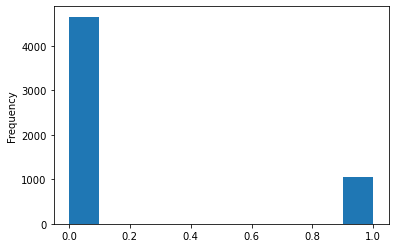

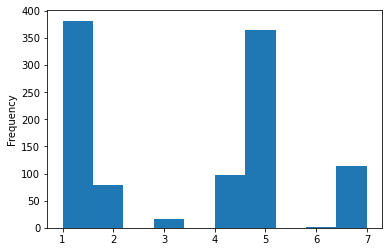

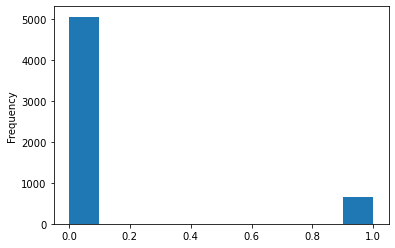

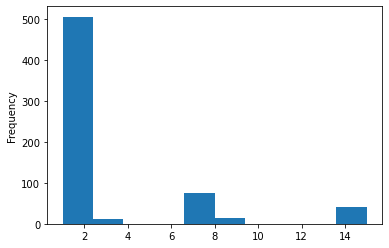

In [11]:
from matplotlib import pyplot as plt

plt.figure()
Y['Deathevent'].plot.hist()

plt.figure()
Y[Y['Deathevent']==1]["Causeofdeath"].plot.hist()

plt.figure()
Y['TechniqueFailureevent'].plot.hist()

plt.figure()
Y[Y['TechniqueFailureevent']==1]["Causeofdropout"].plot.hist()

# Predicting binary outcomes use 6-month average time-series data (using XGBoost):

* Deathevent   
* TechniqueFailureevent

X shape before feature selection:  (5707, 277)
X shape after feature selection:  (5707, 32)
F1 score: 0.2711864406779661, Recall: 0.18867924528301888, Precision: 0.4819277108433735
F1 score: 0.24372759856630824, Recall: 0.16037735849056603, Precision: 0.5074626865671642
F1 score: 0.2576271186440678, Recall: 0.18009478672985782, Precision: 0.4523809523809524
F1 score: 0.3122923588039867, Recall: 0.22274881516587677, Precision: 0.5222222222222223
F1 score: 0.26755852842809363, Recall: 0.1895734597156398, Precision: 0.45454545454545453
Target: Deathevent, mean accuracy: 0.8123353251134671,
           mean F1 score: 0.2704784090240845, mean Recall: 0.18829473307699185, mean Precision: 0.4837078053118334


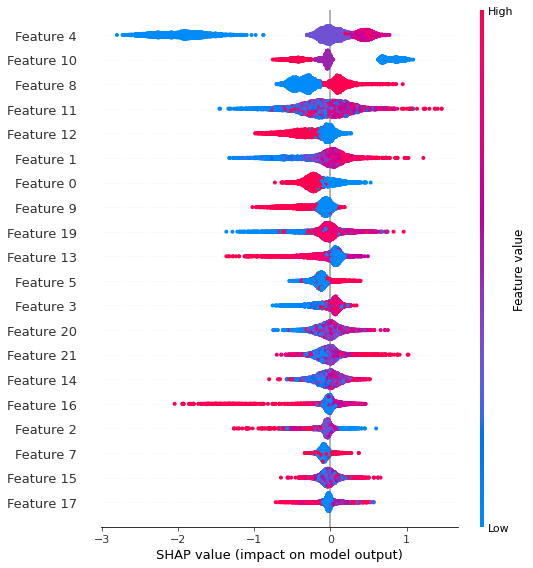

X shape before feature selection:  (5707, 277)
X shape after feature selection:  (5707, 32)
F1 score: 0.01360544217687075, Recall: 0.007692307692307693, Precision: 0.058823529411764705
F1 score: 0.056737588652482275, Recall: 0.03076923076923077, Precision: 0.36363636363636365
F1 score: 0.014184397163120567, Recall: 0.007751937984496124, Precision: 0.08333333333333333
F1 score: 0.027972027972027972, Recall: 0.015503875968992248, Precision: 0.14285714285714285
F1 score: 0.0, Recall: 0.0, Precision: 0.0
Target: TechniqueFailureevent, mean accuracy: 0.8785702774013023,
           mean F1 score: 0.02249989119290031, mean Recall: 0.012343470483005367, mean Precision: 0.1297300738477209


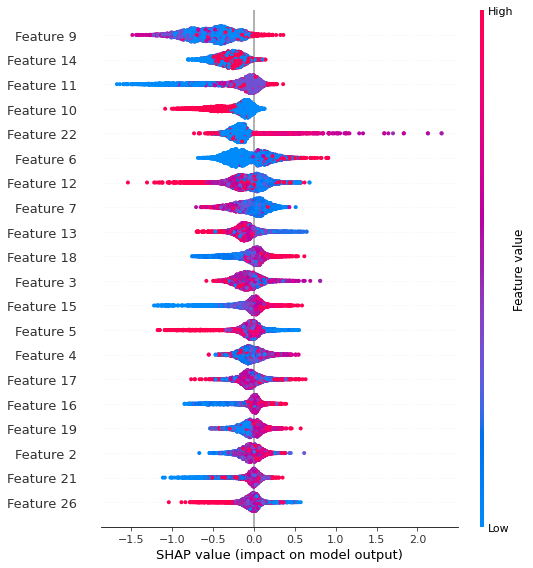

In [16]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
    print("X shape before feature selection: ", X.shape)
    
    # apply feature selection on data
    # remove constant columns
    constant_indices = [12, 13, 68, 81, 94, 120, 146, 159, 172, 185, 198, 211, 224, 237, 250, 263, 276]
    constant_indices.reverse()
    for idx in constant_indices:
        X = X.drop(X.columns[idx], axis=1)
    X = SelectKBest(f_classif, k=32).fit_transform(X, y)
    print("X shape after feature selection: ", X.shape)
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X,y):
#         X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
        #comment if apply feature selection
#         X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
#         X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=5)
        model.fit(X_train_sm, y_train_sm)
#         model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")

        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
#     X_test = X.iloc[test_set,:]
    X_test = X[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
          mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)


In [23]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Predicting binary outcomes use 6-month average time-series data (using neural networks):

* Deathevent   
* TechniqueFailureevent

In [17]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
    print("X shape before feature selection: ", X.shape)
    
    # apply feature selection on data
    # remove constant columns
    constant_indices = [12, 13, 68, 81, 94, 120, 146, 159, 172, 185, 198, 211, 224, 237, 250, 263, 276]
    constant_indices.reverse()
    for idx in constant_indices:
        X = X.drop(X.columns[idx], axis=1)
    X = SelectKBest(f_classif, k=32).fit_transform(X, y)
    print("X shape after feature selection: ", X.shape)
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X,y):
#         X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
#         X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
#         X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
#             keras.layers.Dense(units=8, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
        
        history = model.fit(
            X_train_sm,
            y_train_sm,
            epochs=100
        )
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
        print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

X shape before feature selection:  (5707, 277)
X shape after feature selection:  (5707, 32)
Epoch 1/100
233/233 [==============================] - 0s 895us/step - loss: 4.9069 - accuracy: 0.5345
Epoch 2/100
233/233 [==============================] - 0s 778us/step - loss: 1.0152 - accuracy: 0.5823
Epoch 3/100
233/233 [==============================] - 0s 797us/step - loss: 0.7911 - accuracy: 0.5997
Epoch 4/100
233/233 [==============================] - 0s 823us/step - loss: 0.7268 - accuracy: 0.6151
Epoch 5/100
233/233 [==============================] - 0s 796us/step - loss: 0.7053 - accuracy: 0.6327
Epoch 6/100
233/233 [==============================] - 0s 810us/step - loss: 0.6925 - accuracy: 0.6321
Epoch 7/100
233/233 [==============================] - 0s 761us/step - loss: 0.6703 - accuracy: 0.6415
Epoch 8/100
233/233 [==============================] - 0s 777us/step - loss: 0.6469 - accuracy: 0.6478
Epoch 9/100
233/233 [==============================] - 0s 764us/step - loss: 0.6430 

233/233 [==============================] - 0s 894us/step - loss: 0.5363 - accuracy: 0.7200
Epoch 80/100
233/233 [==============================] - 0s 820us/step - loss: 0.5586 - accuracy: 0.7071
Epoch 81/100
233/233 [==============================] - 0s 711us/step - loss: 0.5574 - accuracy: 0.7101
Epoch 82/100
233/233 [==============================] - 0s 780us/step - loss: 0.5632 - accuracy: 0.7052
Epoch 83/100
233/233 [==============================] - 0s 756us/step - loss: 0.5565 - accuracy: 0.7164
Epoch 84/100
233/233 [==============================] - 0s 743us/step - loss: 0.5494 - accuracy: 0.7151
Epoch 85/100
233/233 [==============================] - 0s 754us/step - loss: 0.5529 - accuracy: 0.7185
Epoch 86/100
233/233 [==============================] - 0s 738us/step - loss: 0.5686 - accuracy: 0.7030
Epoch 87/100
233/233 [==============================] - 0s 775us/step - loss: 0.5529 - accuracy: 0.7185
Epoch 88/100
233/233 [==============================] - 0s 723us/step - loss:

Epoch 57/100
233/233 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7137
Epoch 58/100
233/233 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7075
Epoch 59/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7075
Epoch 60/100
233/233 [==============================] - 0s 861us/step - loss: 0.5554 - accuracy: 0.7152
Epoch 61/100
233/233 [==============================] - 0s 963us/step - loss: 0.5560 - accuracy: 0.7113
Epoch 62/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.7108
Epoch 63/100
233/233 [==============================] - 0s 933us/step - loss: 0.5714 - accuracy: 0.7024
Epoch 64/100
233/233 [==============================] - 0s 815us/step - loss: 0.5555 - accuracy: 0.7177
Epoch 65/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7106
Epoch 66/100
233/233 [==============================] - 0s 1ms/step - loss

233/233 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.6961
Epoch 36/100
233/233 [==============================] - 0s 851us/step - loss: 0.5875 - accuracy: 0.7013
Epoch 37/100
233/233 [==============================] - 0s 810us/step - loss: 0.5995 - accuracy: 0.6914
Epoch 38/100
233/233 [==============================] - 0s 835us/step - loss: 0.5786 - accuracy: 0.6988
Epoch 39/100
233/233 [==============================] - 0s 785us/step - loss: 0.5794 - accuracy: 0.7043
Epoch 40/100
233/233 [==============================] - 0s 737us/step - loss: 0.5857 - accuracy: 0.7013
Epoch 41/100
233/233 [==============================] - 0s 846us/step - loss: 0.5853 - accuracy: 0.7013
Epoch 42/100
233/233 [==============================] - 0s 847us/step - loss: 0.5715 - accuracy: 0.7051
Epoch 43/100
233/233 [==============================] - 0s 809us/step - loss: 0.5765 - accuracy: 0.7009
Epoch 44/100
233/233 [==============================] - 0s 700us/step - loss: 0

233/233 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.6735
Epoch 14/100
233/233 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.6800
Epoch 15/100
233/233 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.6765
Epoch 16/100
233/233 [==============================] - 0s 1ms/step - loss: 0.6010 - accuracy: 0.6907
Epoch 17/100
233/233 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6778
Epoch 18/100
233/233 [==============================] - 0s 1ms/step - loss: 0.6015 - accuracy: 0.6899
Epoch 19/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.6887
Epoch 20/100
233/233 [==============================] - 0s 850us/step - loss: 0.5936 - accuracy: 0.6864
Epoch 21/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.6902
Epoch 22/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy

233/233 [==============================] - 0s 833us/step - loss: 0.5386 - accuracy: 0.7258
Epoch 93/100
233/233 [==============================] - 0s 831us/step - loss: 0.5463 - accuracy: 0.7196
Epoch 94/100
233/233 [==============================] - 0s 817us/step - loss: 0.5337 - accuracy: 0.7349
Epoch 95/100
233/233 [==============================] - 0s 774us/step - loss: 0.5305 - accuracy: 0.7355
Epoch 96/100
233/233 [==============================] - 0s 788us/step - loss: 0.5205 - accuracy: 0.7395
Epoch 97/100
233/233 [==============================] - 0s 801us/step - loss: 0.5244 - accuracy: 0.7430
Epoch 98/100
233/233 [==============================] - 0s 804us/step - loss: 0.5324 - accuracy: 0.7265
Epoch 99/100
233/233 [==============================] - 0s 809us/step - loss: 0.5252 - accuracy: 0.7379
Epoch 100/100
233/233 [==============================] - 0s 815us/step - loss: 0.5191 - accuracy: 0.7417
[1 1 1 ... 1 1 0]
F1 score: 0.3785488958990536, Recall: 0.5687203791469194, 

233/233 [==============================] - 0s 803us/step - loss: 0.5694 - accuracy: 0.6988
Epoch 71/100
233/233 [==============================] - 0s 834us/step - loss: 0.5626 - accuracy: 0.7046
Epoch 72/100
233/233 [==============================] - 0s 784us/step - loss: 0.5596 - accuracy: 0.7137
Epoch 73/100
233/233 [==============================] - 0s 732us/step - loss: 0.5536 - accuracy: 0.7105
Epoch 74/100
233/233 [==============================] - 0s 746us/step - loss: 0.5536 - accuracy: 0.7116
Epoch 75/100
233/233 [==============================] - 0s 740us/step - loss: 0.5489 - accuracy: 0.7172
Epoch 76/100
233/233 [==============================] - 0s 759us/step - loss: 0.5474 - accuracy: 0.7198
Epoch 77/100
233/233 [==============================] - 0s 737us/step - loss: 0.5333 - accuracy: 0.7289
Epoch 78/100
233/233 [==============================] - 0s 807us/step - loss: 0.5394 - accuracy: 0.7196
Epoch 79/100
233/233 [==============================] - 0s 733us/step - loss:

253/253 [==============================] - 0s 667us/step - loss: 0.6790 - accuracy: 0.6060
Epoch 46/100
253/253 [==============================] - 0s 710us/step - loss: 0.6533 - accuracy: 0.6218
Epoch 47/100
253/253 [==============================] - 0s 709us/step - loss: 0.6713 - accuracy: 0.6072
Epoch 48/100
253/253 [==============================] - 0s 669us/step - loss: 0.6380 - accuracy: 0.6285
Epoch 49/100
253/253 [==============================] - 0s 724us/step - loss: 0.6636 - accuracy: 0.6210
Epoch 50/100
253/253 [==============================] - 0s 666us/step - loss: 0.6666 - accuracy: 0.6197
Epoch 51/100
253/253 [==============================] - 0s 689us/step - loss: 0.6492 - accuracy: 0.6240
Epoch 52/100
253/253 [==============================] - 0s 696us/step - loss: 0.6603 - accuracy: 0.6159
Epoch 53/100
253/253 [==============================] - 0s 679us/step - loss: 0.6301 - accuracy: 0.6370
Epoch 54/100
253/253 [==============================] - 0s 779us/step - loss:

Epoch 23/100
253/253 [==============================] - 0s 761us/step - loss: 0.6448 - accuracy: 0.6345
Epoch 24/100
253/253 [==============================] - 0s 741us/step - loss: 0.6393 - accuracy: 0.6357
Epoch 25/100
253/253 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.6330
Epoch 26/100
253/253 [==============================] - 0s 889us/step - loss: 0.6261 - accuracy: 0.6438
Epoch 27/100
253/253 [==============================] - 0s 830us/step - loss: 0.6285 - accuracy: 0.6378
Epoch 28/100
253/253 [==============================] - 0s 768us/step - loss: 0.6663 - accuracy: 0.6281
Epoch 29/100
253/253 [==============================] - 0s 736us/step - loss: 0.6494 - accuracy: 0.6276
Epoch 30/100
253/253 [==============================] - 0s 753us/step - loss: 0.6403 - accuracy: 0.6286
Epoch 31/100
253/253 [==============================] - 0s 770us/step - loss: 0.6450 - accuracy: 0.6392
Epoch 32/100
253/253 [==============================] - 0s 799us/s

Epoch 1/100
253/253 [==============================] - 0s 639us/step - loss: 7.9288 - accuracy: 0.5083
Epoch 2/100
253/253 [==============================] - 0s 711us/step - loss: 1.8380 - accuracy: 0.5263
Epoch 3/100
253/253 [==============================] - 0s 720us/step - loss: 1.2196 - accuracy: 0.5416
Epoch 4/100
253/253 [==============================] - 0s 713us/step - loss: 1.0216 - accuracy: 0.5493
Epoch 5/100
253/253 [==============================] - 0s 686us/step - loss: 0.9375 - accuracy: 0.5546
Epoch 6/100
253/253 [==============================] - 0s 689us/step - loss: 0.8855 - accuracy: 0.5574
Epoch 7/100
253/253 [==============================] - 0s 698us/step - loss: 0.8980 - accuracy: 0.5588
Epoch 8/100
253/253 [==============================] - 0s 664us/step - loss: 0.8888 - accuracy: 0.5579
Epoch 9/100
253/253 [==============================] - 0s 695us/step - loss: 0.8535 - accuracy: 0.5705
Epoch 10/100
253/253 [==============================] - 0s 679us/step - l

253/253 [==============================] - 0s 728us/step - loss: 0.7027 - accuracy: 0.6072
Epoch 80/100
253/253 [==============================] - 0s 716us/step - loss: 0.7067 - accuracy: 0.6014
Epoch 81/100
253/253 [==============================] - 0s 700us/step - loss: 0.6861 - accuracy: 0.6107
Epoch 82/100
253/253 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6098
Epoch 83/100
253/253 [==============================] - 0s 745us/step - loss: 0.6952 - accuracy: 0.6051
Epoch 84/100
253/253 [==============================] - 0s 706us/step - loss: 0.6715 - accuracy: 0.6215
Epoch 85/100
253/253 [==============================] - 0s 733us/step - loss: 0.7414 - accuracy: 0.6091
Epoch 86/100
253/253 [==============================] - 0s 698us/step - loss: 0.6754 - accuracy: 0.6115
Epoch 87/100
253/253 [==============================] - 0s 735us/step - loss: 0.7000 - accuracy: 0.6113
Epoch 88/100
253/253 [==============================] - 0s 699us/step - loss: 0

253/253 [==============================] - 0s 722us/step - loss: 0.6618 - accuracy: 0.6164
Epoch 58/100
253/253 [==============================] - 0s 876us/step - loss: 0.6520 - accuracy: 0.6202
Epoch 59/100
253/253 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.6238
Epoch 60/100
253/253 [==============================] - 0s 923us/step - loss: 0.6557 - accuracy: 0.6201
Epoch 61/100
253/253 [==============================] - 0s 896us/step - loss: 0.6429 - accuracy: 0.6255
Epoch 62/100
253/253 [==============================] - 0s 844us/step - loss: 0.6561 - accuracy: 0.6285
Epoch 63/100
253/253 [==============================] - 0s 818us/step - loss: 0.6519 - accuracy: 0.6173
Epoch 64/100
253/253 [==============================] - 0s 769us/step - loss: 0.6569 - accuracy: 0.6201
Epoch 65/100
253/253 [==============================] - 0s 810us/step - loss: 0.6484 - accuracy: 0.6188
Epoch 66/100
253/253 [==============================] - 0s 932us/step - loss: 0

Epoch 35/100
253/253 [==============================] - 0s 723us/step - loss: 0.6307 - accuracy: 0.6229
Epoch 36/100
253/253 [==============================] - 0s 742us/step - loss: 0.6476 - accuracy: 0.6224
Epoch 37/100
253/253 [==============================] - 0s 667us/step - loss: 0.6460 - accuracy: 0.6191
Epoch 38/100
253/253 [==============================] - 0s 725us/step - loss: 0.6465 - accuracy: 0.6217
Epoch 39/100
253/253 [==============================] - 0s 691us/step - loss: 0.6413 - accuracy: 0.6151
Epoch 40/100
253/253 [==============================] - 0s 655us/step - loss: 0.6341 - accuracy: 0.6248
Epoch 41/100
253/253 [==============================] - 0s 698us/step - loss: 0.6387 - accuracy: 0.6245
Epoch 42/100
253/253 [==============================] - 0s 681us/step - loss: 0.6303 - accuracy: 0.6264
Epoch 43/100
253/253 [==============================] - 0s 710us/step - loss: 0.6296 - accuracy: 0.6325
Epoch 44/100
253/253 [==============================] - 0s 685us

In [ ]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Federated Learning for prediction

* Deathevent   
* TechniqueFailureevent

In [ ]:
import tensorflow as tf
import tensorflow_federated as tff

# Predicting multiclass outcomes:

* Causeofdeath   
* Causeofdropout

Target: Causeofdeath, mean accuracy: 0.3737145667531074, mean f1-score: 0.3737145667531074


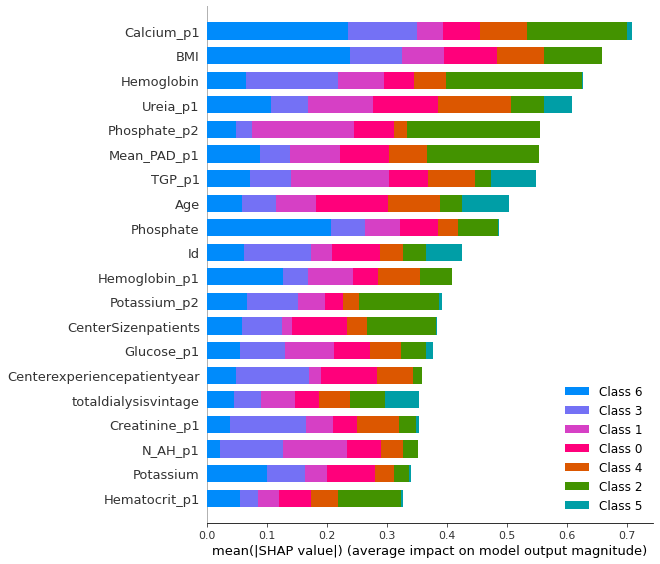

Target: Causeofdropout, mean accuracy: 0.5284068736923764, mean f1-score: 0.5284068736923764


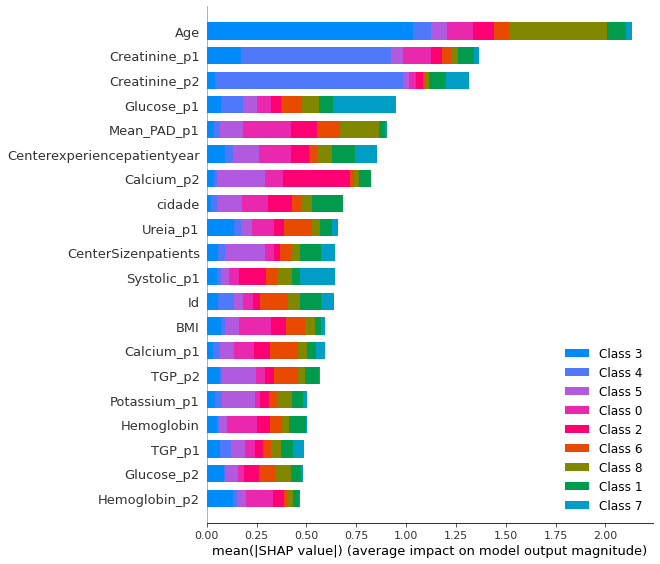

In [68]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []

for target in targets:
    base_data = df_selected[df_selected[indicators[target]]==1]

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX','Bienium','Followup','Followup1y',\
                                'Followup2y','Followup3y',"death_event_1y",\
                                "Tech_event_1y","death_event_2y","Tech_event_2y",\
                                "death_event_3y","Tech_event_3y" ]) # X is based on patients' personal information
    # apply k-fold cross validation
    k = 5
    kf = KFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    j = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=9,
            min_child_weight=4)
        model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred, average='micro')
#         print(f"F1 score: {f1score}")
#         shap.summary_plot(shap_values, X_test)
#         shap_values = np.array(shap_values)
#         print(shap_values.shape)
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=1)
    new_shap_values = list()
    for i in range(shap_values.shape[0]):
        new_shap_values.append(shap_values[i])
    
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean f1-score: {mean_f1_score}")
    
    shap.summary_plot(new_shap_values, X_test)
    
#     # Split data into train and test subsets
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, shuffle=True, random_state=None)
    
#     # Train XGBoost model
#     model = xgboost.XGBClassifier(
#         learning_rate =0.1,
#         max_depth=9,
#         min_child_weight=4)
#     model.fit(X_train, y_train)
    
#     # Use saved models
# #     filename = 'models/' + target + '_multiclass_model.pkl'
# #     model = pickle.load(open(filename, 'rb')) 

#     models.append(model)

#     y_pred = model.predict(X_test)
#     normalised_accuracy = accuracy_score(y_test, y_pred)

#     print(f"Target: {target}, accuracy: {normalised_accuracy}")
    
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer.shap_values(X_test)
#     print(shap_values.shape)
#     print(X_test.shape)

#     shap.summary_plot(shap_values, X_test)

In [69]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: Causeofdeath, Class: 1.0, mean accuracy: 0.6026781722256997, mean f1-score: 0.2954635731418321


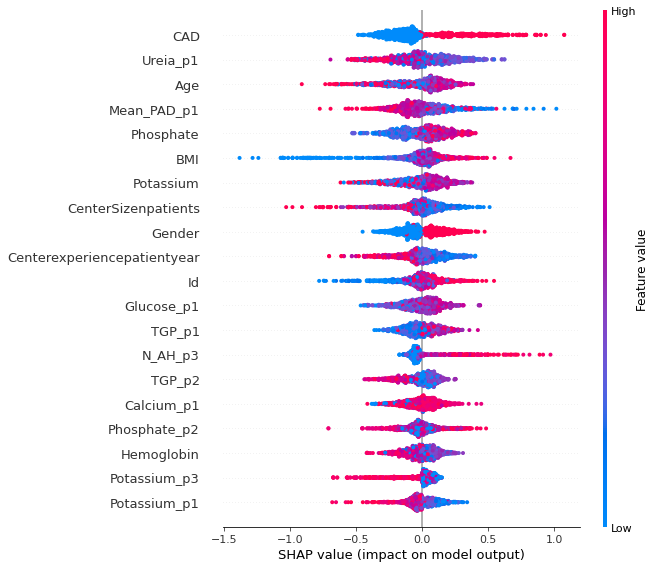

Target: Causeofdeath, Class: 2.0, mean accuracy: 0.924295806134311, mean f1-score: 0.0


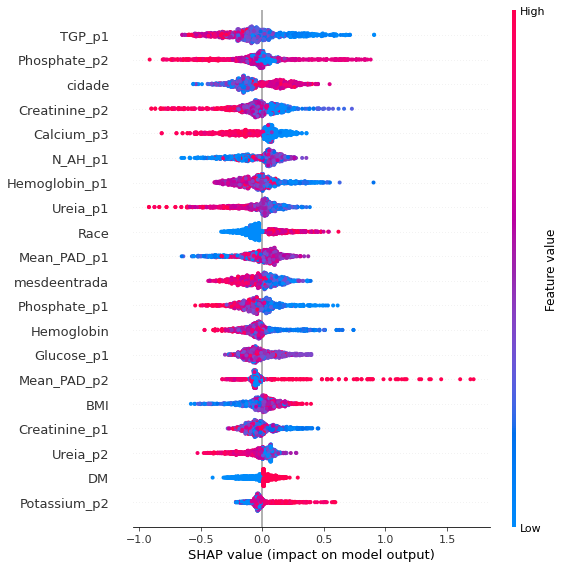

Target: Causeofdeath, Class: 3.0, mean accuracy: 0.9839264955736386, mean f1-score: 0.0


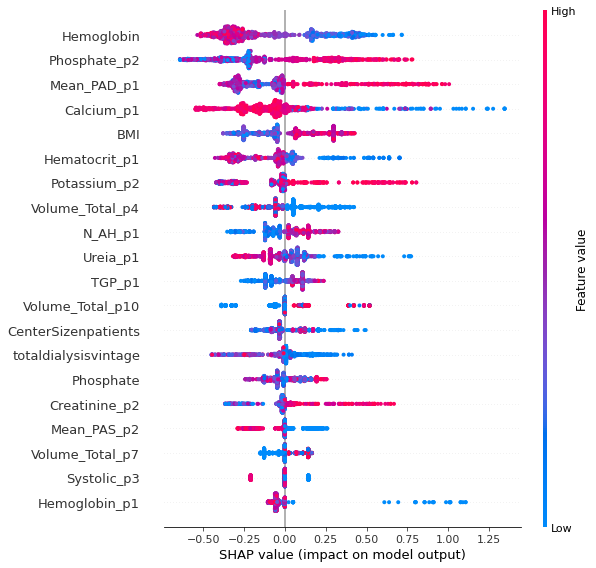

Target: Causeofdeath, Class: 4.0, mean accuracy: 0.9072878476258607, mean f1-score: 0.0


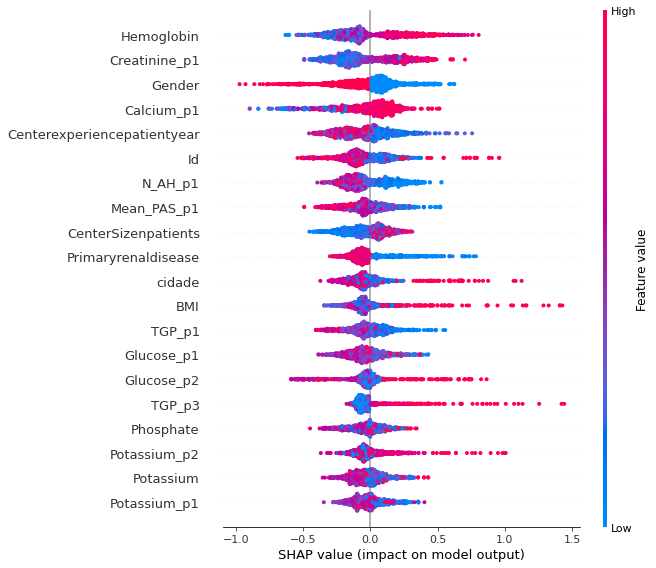

Target: Causeofdeath, Class: 5.0, mean accuracy: 0.6253509791648038, mean f1-score: 0.24324121050289277


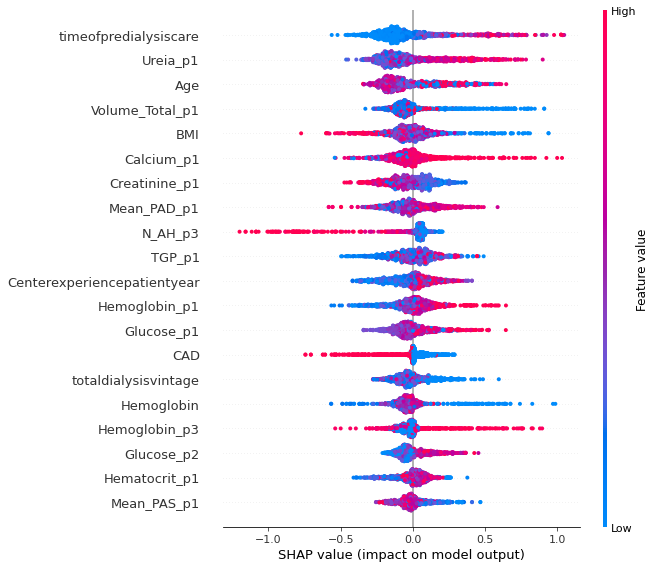

F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 6.0, mean accuracy: 0.9981087364750068, mean f1-score: 0.0


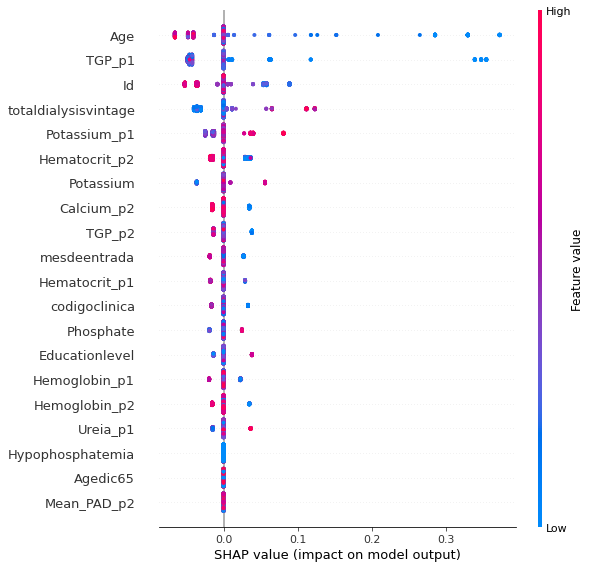

Target: Causeofdeath, Class: 7.0, mean accuracy: 0.8902575337565948, mean f1-score: 0.037037037037037035


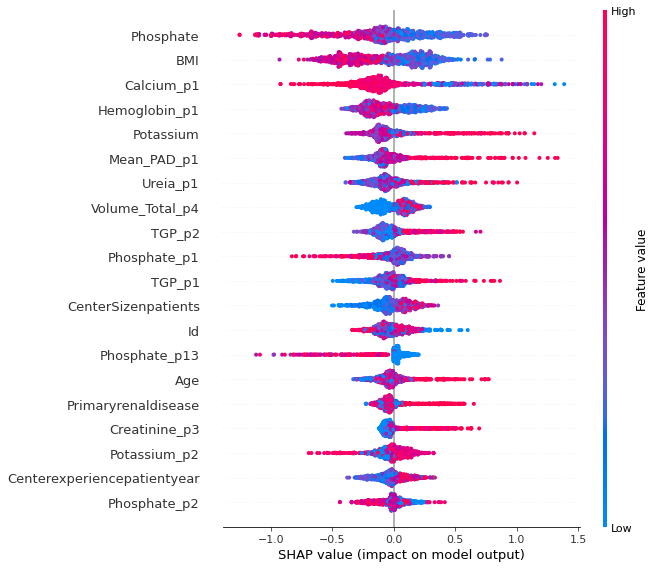

Target: Causeofdropout, Class: 1, mean accuracy: 0.945656926585016, mean f1-score: 0.030769230769230764


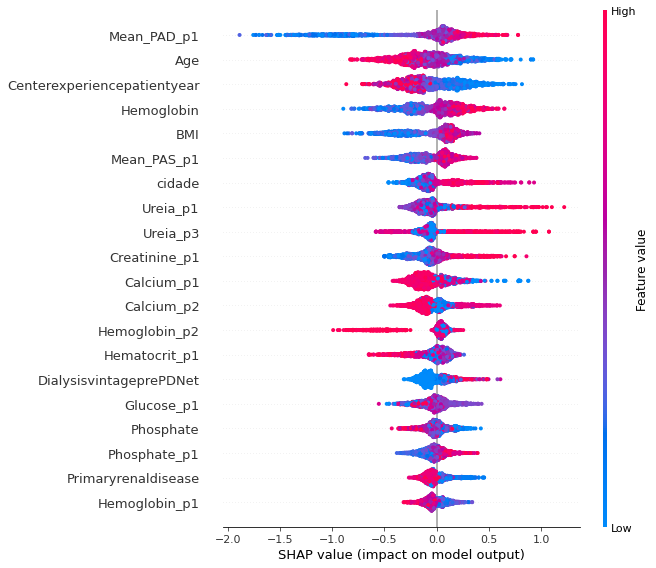

Target: Causeofdropout, Class: 2, mean accuracy: 0.8088495263170268, mean f1-score: 0.14122089617245534


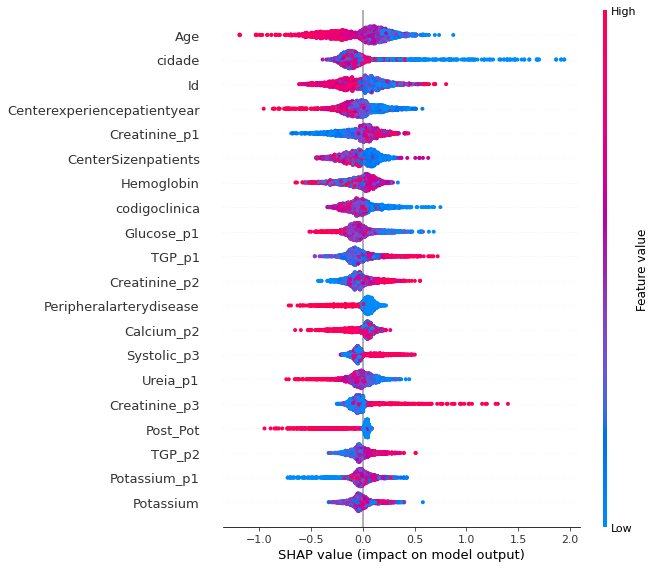

Target: Causeofdropout, Class: 3, mean accuracy: 0.9412973976821271, mean f1-score: 0.0


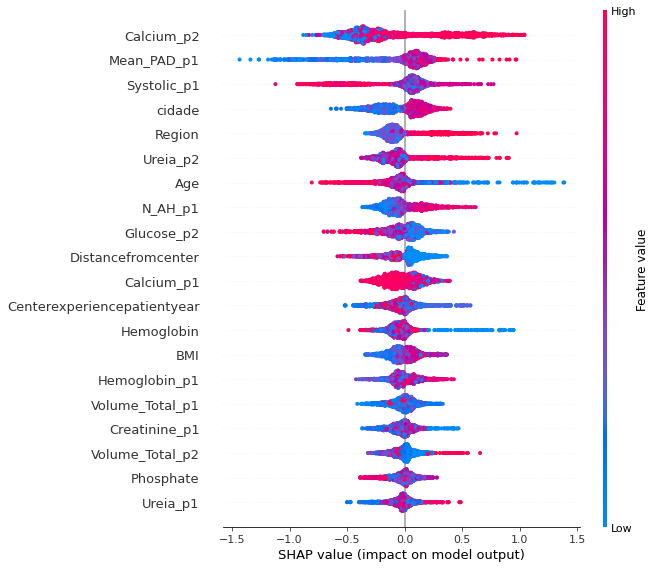

Target: Causeofdropout, Class: 4, mean accuracy: 0.9461376619102471, mean f1-score: 0.19997659541270088


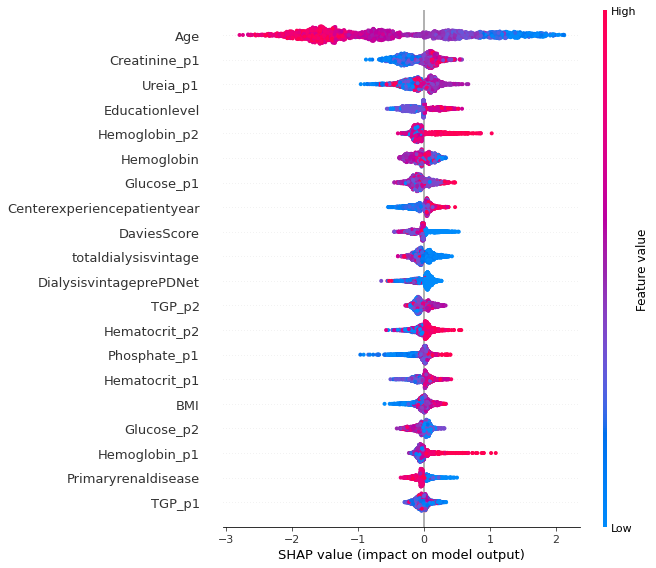

Target: Causeofdropout, Class: 5, mean accuracy: 0.9665177836808576, mean f1-score: 0.14679098679098676


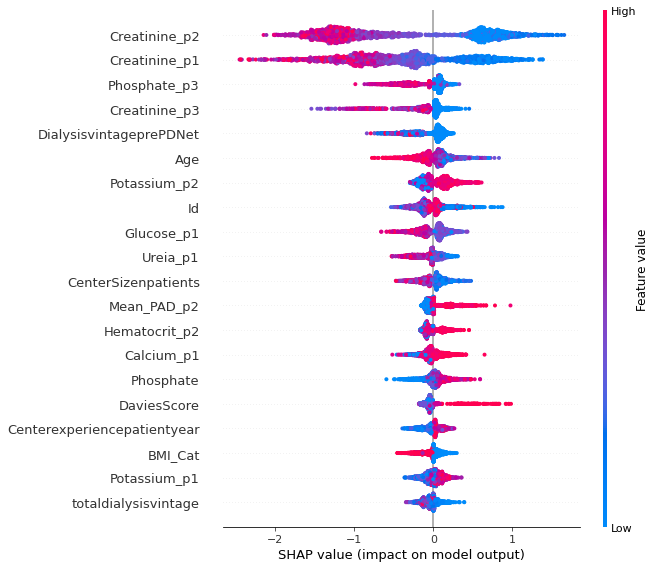

Target: Causeofdropout, Class: 6, mean accuracy: 0.9495380709466608, mean f1-score: 0.08704589757221337


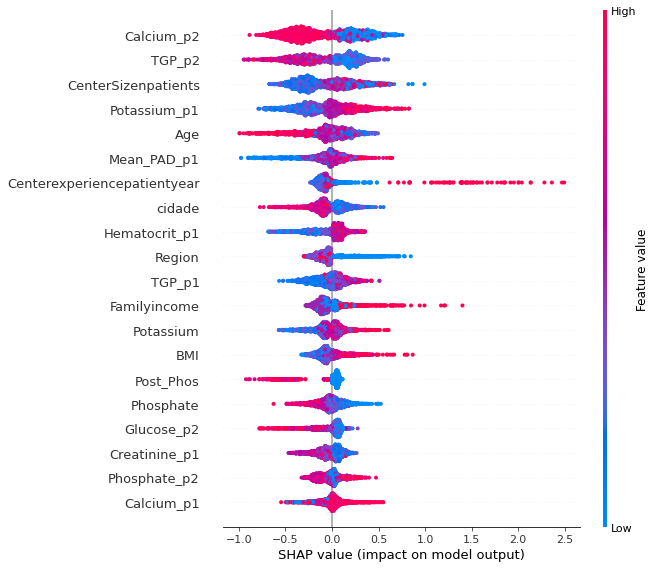

Target: Causeofdropout, Class: 7, mean accuracy: 0.9626460424551588, mean f1-score: 0.0


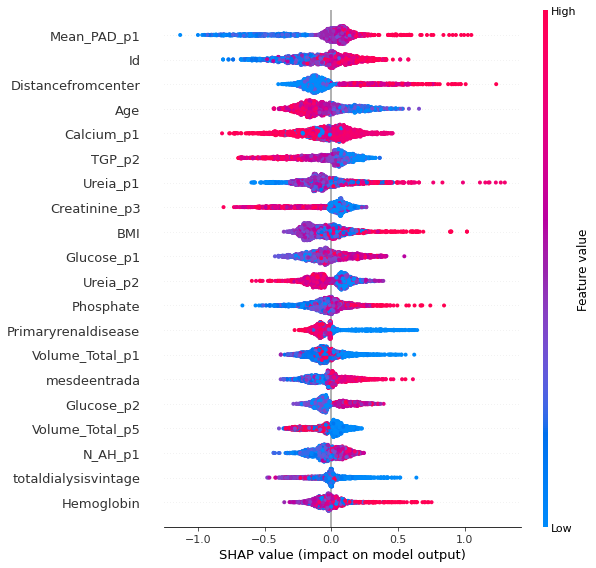

Target: Causeofdropout, Class: 8, mean accuracy: 0.9927207973859282, mean f1-score: 0.0


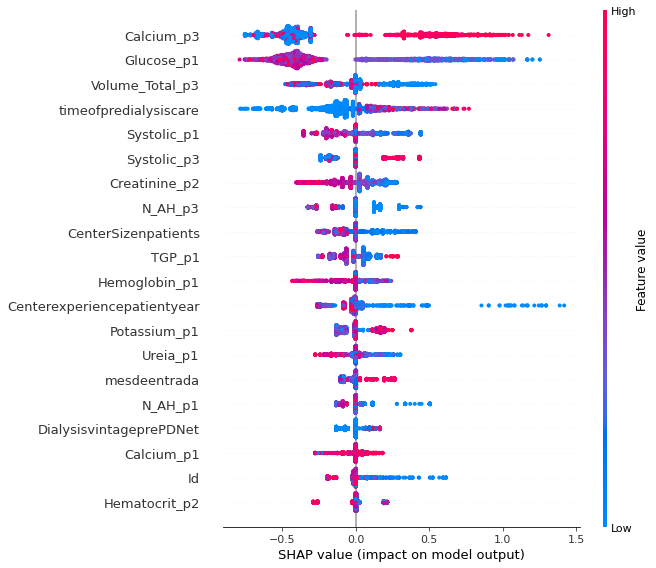

Target: Causeofdropout, Class: 10, mean accuracy: 0.6695785044312278, mean f1-score: 0.6862885349034895


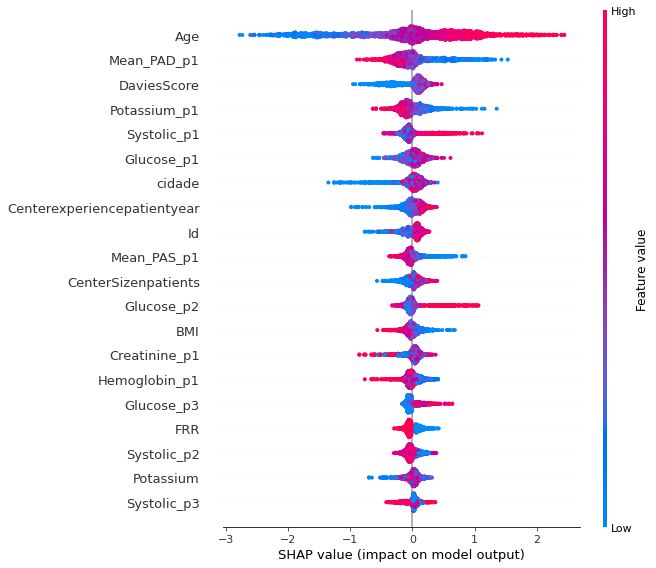

In [20]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []
classnumlist = []

for target in targets:
    base_data = df_selected[df_selected[indicators[target]]==1]

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX','Bienium','Followup','Followup1y',\
                                'Followup2y','Followup3y',"death_event_1y",\
                                "Tech_event_1y","death_event_2y","Tech_event_2y",\
                                "death_event_3y","Tech_event_3y" ]) # X is based on patients' personal information
    
    set1 = set(y)
    classnumlist.append(set1)
    
    for classidx in set1:
        # Create binary classification labels
        y = np.array(y)
        ybi = np.zeros(y.shape)
        for i in range(len(y)):
            if y[i] == classidx:
                ybi[i] = 1
            else:
                ybi[i] = -1
        
        # apply k-fold cross validation
        k = 5
        kf = KFold(n_splits=k,shuffle=True,random_state=1)

        list_shap_values = list()
        list_test_sets = list()
        list_normalised_accuracy = list()
        list_f1_score = list()
        j = 0

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train, y_test = ybi[train_index], ybi[test_index]
            X_train = pd.DataFrame(X_train,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)

            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=9,
                min_child_weight=4)
            model.fit(X_train, y_train)

            # use saved model
#             filename = 'models/' + target + '_class' + str(classidx) + '_fold'+ str(j) + '_binary_model.pkl'
#             j = j + 1
#             model = pickle.load(open(filename, 'rb'))


            # explaining model
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
            y_pred = model.predict(X_test)
            normalised_accuracy = accuracy_score(y_test, y_pred)
            f1score = f1_score(y_test, y_pred)
#             print(f"F1 score: {f1score}")
#             shap.summary_plot(shap_values, X_test)
#             print(shap_values.shape)

            # for each iteration we save the test_set index and the shap_values
            list_shap_values.append(shap_values)
            list_test_sets.append(test_index)
            list_normalised_accuracy.append(normalised_accuracy)
            list_f1_score.append(f1score)
            models.append(model)

        #combining results from all iterations
        test_set = list_test_sets[0]
        shap_values = np.array(list_shap_values[0])
        for i in range(0,len(list_test_sets)):
            test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
            shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)

        #bringing back variable names    
        X_test = X.iloc[test_set,:]

        mean_normalised_accuracy = np.mean(list_normalised_accuracy)
        mean_f1_score = np.mean(list_f1_score)
        
        print(f"Target: {target}, Class: {classidx}, mean accuracy: {mean_normalised_accuracy}, mean f1-score: {mean_f1_score}")

        shap.summary_plot(shap_values, X_test)
                
                
                
#         # Split data into train and test subsets
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, ybi, test_size=0.2, shuffle=True, random_state=None)
        
#         # Train XGBoost model
#         model = xgboost.XGBClassifier(
#             learning_rate =0.1,
#             max_depth=9,
#             min_child_weight=4)
#         model.fit(X_train, y_train)
        
            
#         # Use saved models
# #         filename = 'models/' + target + '_class' + str(classidx) + '_binary_model.pkl'
# #         model = pickle.load(open(filename, 'rb')) 
        
        
#         models.append(model)

#         y_pred = model.predict(X_test)
#         normalised_accuracy = accuracy_score(y_test, y_pred)
        
#         print("Binary classification for Class",classidx)
#         print(f"Target: {target}, accuracy: {normalised_accuracy}")

#         explainer = shap.TreeExplainer(model)
#         shap_values = explainer.shap_values(X_test)

#         shap.summary_plot(shap_values, X_test)

In [18]:
# Save predictive models
import pickle

i = 0
j = 0
model = None
for target in targets:
    classnum = classnumlist[i]
    for classidx in classnum:
        for ik in range(k):         
            filename = 'models/' + target + '_class' + str(classidx) + '_fold' + str(ik) + '_binary_model.pkl'
            model = models[j]
            with open(filename, 'wb') as file:  
                pickle.dump(model, file)
            j = j + 1
    i = i + 1

# Predicting binary outcomes for events in different years (using XGBoost):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [46]:
baseline = df[unique_cols].copy()

numofpatient = baseline.shape[0]

labelnames = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic',
             'PAS', 'PAD', 'Uso_de_anti_hipert', 'inibidor']

dfs = [df[unique_cols], df[unique_cols], df[unique_cols]]
maxmonths = [6, 18, 30]


for year in range(3):
    for labelname in labelnames:
        for patient_idx in range(numofpatient):
            # compute the max index of month including nonzero data
            maxmonth = maxmonths[year]
            maxname = labelname + str(maxmonth)
            temp = df.at[patient_idx, maxname]
            while temp == 0 and maxmonth >= maxmonths[year]-5:
                maxmonth = maxmonth - 1
                maxname = labelname + str(maxmonth)
                if maxmonth >= maxmonths[year]-5:
                    temp = df.at[patient_idx, maxname]

            # compute the average of 3 months
            mean_months = 0
            if maxmonth >= maxmonths[year]-3:
                for i in range(maxmonth-2, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/3
            elif maxmonth == maxmonths[year]-4:
                for i in range(maxmonth-1, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/2
            elif maxmonth == maxmonths[year]-5:
                name = labelname + str(maxmonth)
                mean_months = df.at[patient_idx, name]
            else:
                mean_months = 0
            yearname = str(year+1)+'Y'
            name = labelname + '_mean_months_' + yearname
            dfs[year].loc[patient_idx, name] = mean_months


extra_1y = ['Mean_PAS_1T', 'Mean_PAD_1T']
extra_2y = ['Mean_PAS_3T', 'Mean_PAD_3T']
extra_3y = ['Mean_PAS_5T', 'Mean_PAD_5T']
extras = [extra_1y, extra_2y, extra_3y]

for year in range(3):
    for index in extras[year]:
            dfs[year].loc[:,index] = df[index]    
    dfs[year] = dfs[year].fillna(0)
        
display(dfs[1])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,ModalidadeDPInicial,...,Volume_Total_mean_months_2Y,N_AH__mean_months_2Y,Systolic_mean_months_2Y,Diastolic_mean_months_2Y,PAS_mean_months_2Y,PAD_mean_months_2Y,Uso_de_anti_hipert_mean_months_2Y,inibidor_mean_months_2Y,Mean_PAS_3T,Mean_PAD_3T
0,12.933333,4.433333,5.300000,110.500000,70.000000,0,1,0,128,0.0,...,8000.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,14.000000,3.766667,5.933333,129.500000,77.000000,0,1,0,128,0.0,...,8000.0,0.0,135.666667,73.0,135.666667,73.0,0.0,0.0,136.000000,82.000000
2,11.833333,4.366667,6.100000,158.000000,81.000000,1,1,1,128,1.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,147.000000,80.000000
3,10.066667,4.733333,5.533333,140.000000,75.000000,1,1,0,128,0.0,...,8000.0,1.0,174.666667,84.0,174.666667,84.0,1.0,1.0,169.333333,99.000000
4,11.933333,4.033333,4.066667,103.500000,60.000000,0,1,2,128,0.0,...,8000.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,129.333333,72.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,126.666667,76.666667,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,120.000000,80.000000
5703,9.700000,4.300000,3.233333,130.000000,80.000000,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5704,10.466667,4.433333,4.466667,136.666667,80.000000,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5705,11.766667,4.533333,3.566667,126.666667,80.000000,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


Target: death_event_1y, mean accuracy: 0.9102868562464792, mean F1 score: 0.32646733261316185,
           mean Recall: 0.24218541785646294, mean Precision: 0.5052421882089628


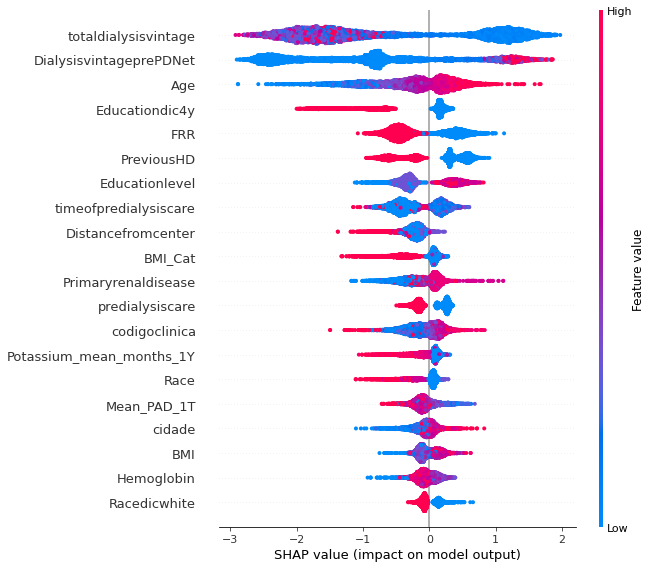

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup1y, mean accuracy: 1.0, mean F1 score: 1.0,
           mean Recall: 1.0, mean Precision: 1.0


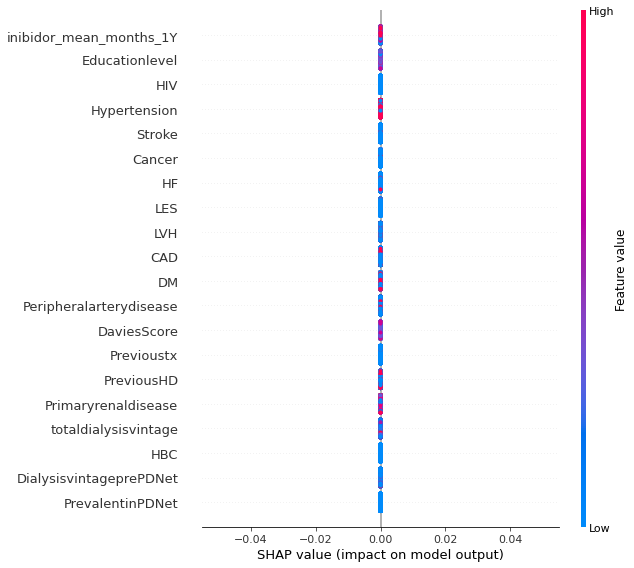

Target: Tech_event_1y, mean accuracy: 0.9432288940631854, mean F1 score: 0.04317460317460318,
           mean Recall: 0.02579124579124579, mean Precision: 0.13777777777777778


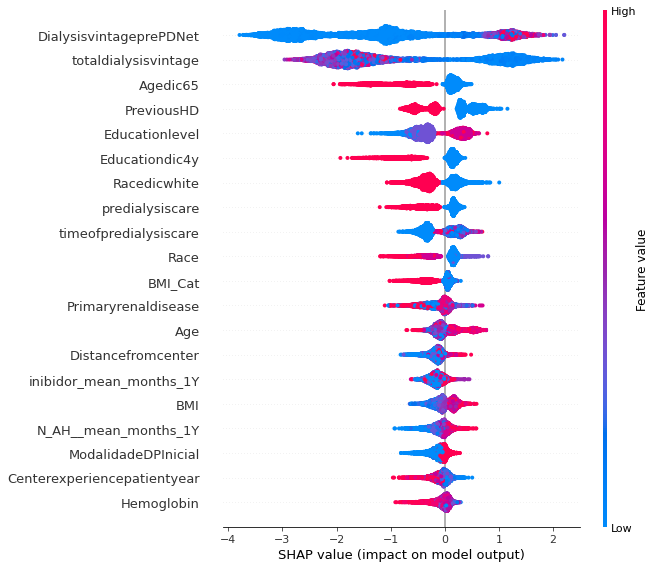

In [47]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    database = dfs[0].copy()
    X = database

    if target == "Followup1y":
        temp = Y[target]
        y = []
        for it in temp:
            if it > 0:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)

            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=8,
                min_child_weight=3)
            model.fit(X_train_sm, y_train_sm)
        
        else:
            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=8,
                min_child_weight=3)
            model.fit(X_train, y_train)
            
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

In [48]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_2y, mean accuracy: 0.9353224254090472, mean F1 score: 0.13423425224293917,
           mean Recall: 0.08524590163934427, mean Precision: 0.3262788192199957


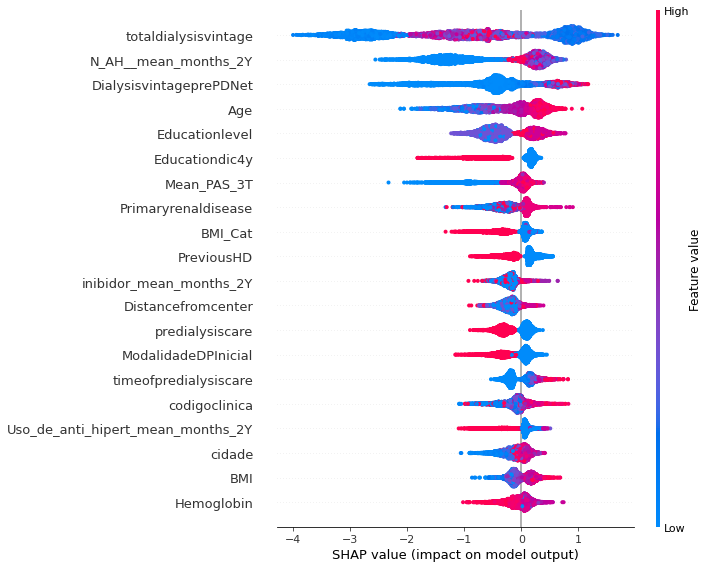

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup2y, mean accuracy: 0.9852828271510381, mean F1 score: 0.987202901089573,
           mean Recall: 0.983314939991723, mean Precision: 0.9911419882871154


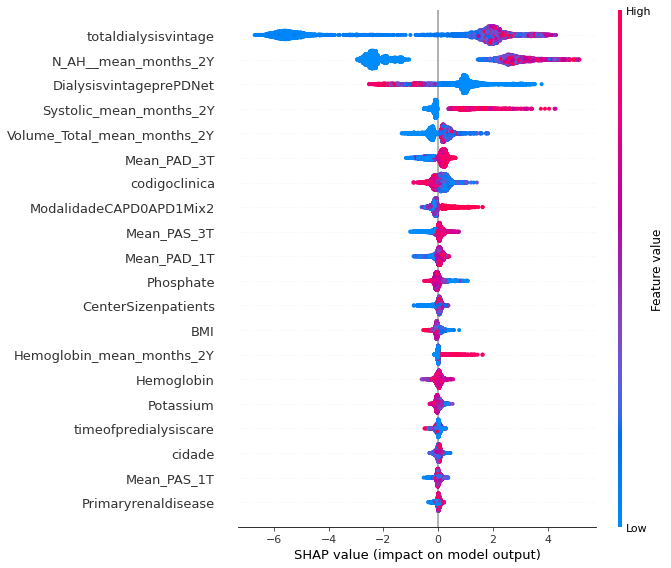

Target: Tech_event_2y, mean accuracy: 0.9578580613681531, mean F1 score: 0.06549619847939177,
           mean Recall: 0.039390243902439025, mean Precision: 0.19834054834054832


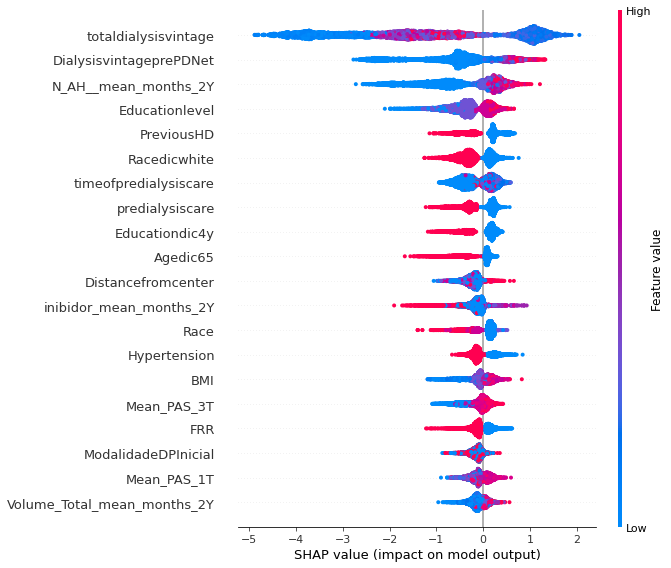

In [55]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] == 0].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup2y"] - Y["Followup1y"]
        y = []
        for it in temp:
            if it > 0:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train_sm, y_train_sm)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

In [56]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_3y, mean accuracy: 0.9642126789366054, mean F1 score: 0.19060236707295528,
           mean Recall: 0.13698924731182796, mean Precision: 0.33835497835497835


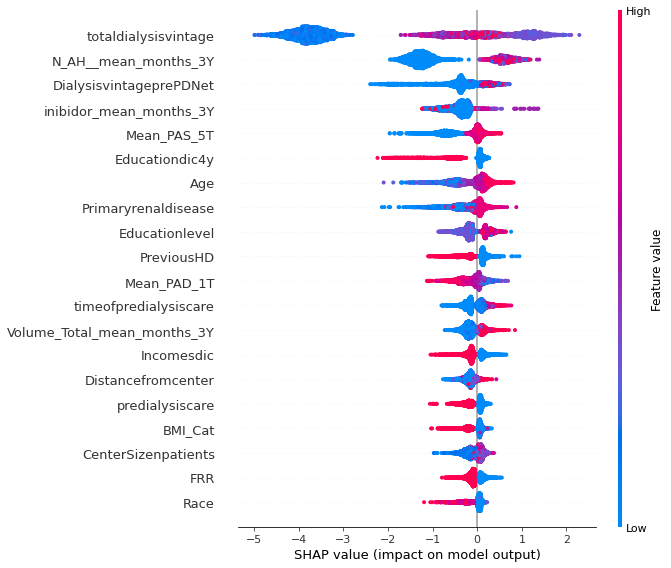

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup3y, mean accuracy: 0.9833121809904813, mean F1 score: 0.982453676883496,
           mean Recall: 0.9722536356962881, mean Precision: 0.9929067299031002


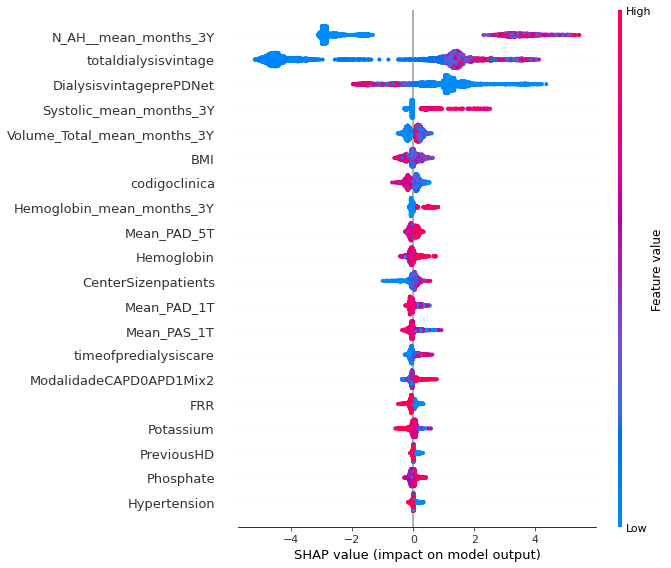

Target: Tech_event_3y, mean accuracy: 0.9780158551885474, mean F1 score: 0.06555183946488294,
           mean Recall: 0.04444444444444444, mean Precision: 0.13


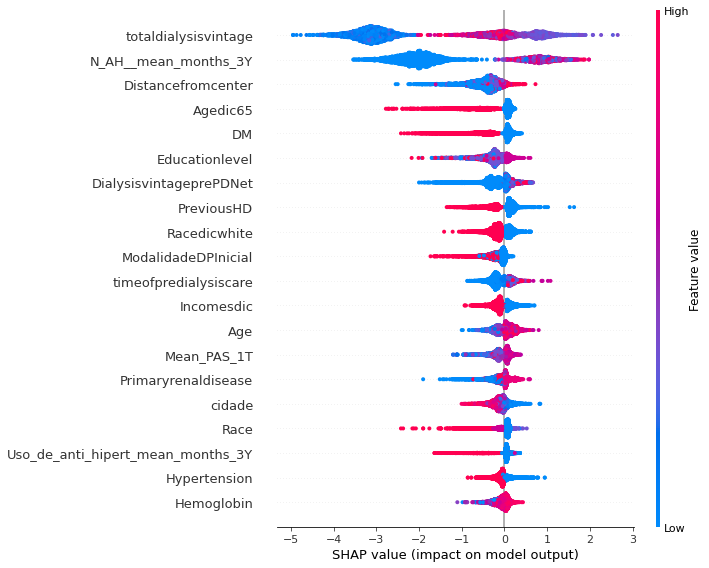

In [57]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup1y"] == 0) | (df["Followup2y"] - df["Followup1y"] == 0)].index
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup3y"] - Y["Followup2y"]
        y = []
        for it in temp:
            if it > 0:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)    
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train_sm, y_train_sm)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

In [58]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Predicting binary outcomes for events in different years (using neural networks):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [39]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    X = dfs[0].copy()

    if target == "Followup1y":
        temp = Y[target]
        y = []
        for it in temp:
            if it > 0:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=64, activation='relu',dtype='float64'),
#             keras.layers.Dense(units=8, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
        
        if target != "Followup1y":
            history = model.fit(
                X_train_sm,
                y_train_sm,
                epochs=100
            )
        else:
            history = model.fit(
                X_train,
                y_train,
                epochs=100
            )
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
        print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

Epoch 1/100
260/260 [==============================] - 0s 949us/step - loss: 115.4999 - accuracy: 0.5420
Epoch 2/100
260/260 [==============================] - 0s 865us/step - loss: 10.3051 - accuracy: 0.6205
Epoch 3/100
260/260 [==============================] - 0s 937us/step - loss: 7.6750 - accuracy: 0.6753
Epoch 4/100
260/260 [==============================] - 0s 909us/step - loss: 9.9016 - accuracy: 0.6645
Epoch 5/100
260/260 [==============================] - 0s 837us/step - loss: 7.8278 - accuracy: 0.6923
Epoch 6/100
260/260 [==============================] - 0s 871us/step - loss: 6.1618 - accuracy: 0.7210
Epoch 7/100
260/260 [==============================] - 0s 829us/step - loss: 6.5294 - accuracy: 0.7226
Epoch 8/100
260/260 [==============================] - 0s 889us/step - loss: 5.0181 - accuracy: 0.7427
Epoch 9/100
260/260 [==============================] - 0s 902us/step - loss: 3.8139 - accuracy: 0.7705
Epoch 10/100
260/260 [==============================] - 0s 870us/step 

Epoch 80/100
260/260 [==============================] - 0s 893us/step - loss: 4.6238 - accuracy: 0.8376
Epoch 81/100
260/260 [==============================] - 0s 802us/step - loss: 3.1842 - accuracy: 0.8607
Epoch 82/100
260/260 [==============================] - 0s 816us/step - loss: 4.4822 - accuracy: 0.8440
Epoch 83/100
260/260 [==============================] - 0s 821us/step - loss: 5.1384 - accuracy: 0.8293
Epoch 84/100
260/260 [==============================] - 0s 826us/step - loss: 4.5502 - accuracy: 0.8378
Epoch 85/100
260/260 [==============================] - 0s 819us/step - loss: 4.1509 - accuracy: 0.8407
Epoch 86/100
260/260 [==============================] - 0s 822us/step - loss: 3.8010 - accuracy: 0.8466
Epoch 87/100
260/260 [==============================] - 0s 826us/step - loss: 4.1357 - accuracy: 0.8404
Epoch 88/100
260/260 [==============================] - 0s 803us/step - loss: 3.1876 - accuracy: 0.8555
Epoch 89/100
260/260 [==============================] - 0s 809us

260/260 [==============================] - 0s 845us/step - loss: 4.6903 - accuracy: 0.8198
Epoch 58/100
260/260 [==============================] - 0s 797us/step - loss: 3.4647 - accuracy: 0.8390
Epoch 59/100
260/260 [==============================] - 0s 823us/step - loss: 6.1459 - accuracy: 0.8146
Epoch 60/100
260/260 [==============================] - 0s 818us/step - loss: 6.4931 - accuracy: 0.8051
Epoch 61/100
260/260 [==============================] - 0s 921us/step - loss: 5.9785 - accuracy: 0.8122
Epoch 62/100
260/260 [==============================] - 0s 912us/step - loss: 6.5108 - accuracy: 0.8092
Epoch 63/100
260/260 [==============================] - 0s 843us/step - loss: 3.1900 - accuracy: 0.8453
Epoch 64/100
260/260 [==============================] - 0s 843us/step - loss: 3.7562 - accuracy: 0.8341
Epoch 65/100
260/260 [==============================] - 0s 884us/step - loss: 3.9415 - accuracy: 0.8352
Epoch 66/100
260/260 [==============================] - 0s 1ms/step - loss: 2

260/260 [==============================] - 0s 810us/step - loss: 4.7704 - accuracy: 0.8159
Epoch 36/100
260/260 [==============================] - 0s 858us/step - loss: 6.4526 - accuracy: 0.8011
Epoch 37/100
260/260 [==============================] - 0s 779us/step - loss: 7.4891 - accuracy: 0.7891
Epoch 38/100
260/260 [==============================] - 0s 845us/step - loss: 6.0267 - accuracy: 0.8111
Epoch 39/100
260/260 [==============================] - 0s 877us/step - loss: 7.1472 - accuracy: 0.7975
Epoch 40/100
260/260 [==============================] - 0s 784us/step - loss: 5.6542 - accuracy: 0.8206
Epoch 41/100
260/260 [==============================] - 0s 849us/step - loss: 6.3563 - accuracy: 0.8073
Epoch 42/100
260/260 [==============================] - 0s 795us/step - loss: 5.2213 - accuracy: 0.8180
Epoch 43/100
260/260 [==============================] - 0s 849us/step - loss: 5.4131 - accuracy: 0.8209
Epoch 44/100
260/260 [==============================] - 0s 818us/step - loss:

260/260 [==============================] - 0s 1ms/step - loss: 6.7122 - accuracy: 0.7415
Epoch 14/100
260/260 [==============================] - 0s 854us/step - loss: 5.8757 - accuracy: 0.7676
Epoch 15/100
260/260 [==============================] - 0s 811us/step - loss: 5.3080 - accuracy: 0.7673
Epoch 16/100
260/260 [==============================] - 0s 826us/step - loss: 3.5939 - accuracy: 0.7969
Epoch 17/100
260/260 [==============================] - 0s 837us/step - loss: 5.6393 - accuracy: 0.7661
Epoch 18/100
260/260 [==============================] - 0s 831us/step - loss: 4.3359 - accuracy: 0.7927
Epoch 19/100
260/260 [==============================] - 0s 844us/step - loss: 3.2200 - accuracy: 0.8031
Epoch 20/100
260/260 [==============================] - 0s 830us/step - loss: 8.7512 - accuracy: 0.7462
Epoch 21/100
260/260 [==============================] - 0s 799us/step - loss: 7.2043 - accuracy: 0.7552
Epoch 22/100
260/260 [==============================] - 0s 815us/step - loss: 4

260/260 [==============================] - 0s 1ms/step - loss: 4.3950 - accuracy: 0.8323
Epoch 93/100
260/260 [==============================] - 0s 838us/step - loss: 3.1098 - accuracy: 0.8396
Epoch 94/100
260/260 [==============================] - 0s 796us/step - loss: 2.8997 - accuracy: 0.8481
Epoch 95/100
260/260 [==============================] - 0s 1ms/step - loss: 4.3332 - accuracy: 0.8265
Epoch 96/100
260/260 [==============================] - 0s 903us/step - loss: 3.3872 - accuracy: 0.8438
Epoch 97/100
260/260 [==============================] - 0s 819us/step - loss: 2.8356 - accuracy: 0.8500
Epoch 98/100
260/260 [==============================] - 0s 861us/step - loss: 2.7103 - accuracy: 0.8511
Epoch 99/100
260/260 [==============================] - 0s 762us/step - loss: 5.7536 - accuracy: 0.8139
Epoch 100/100
260/260 [==============================] - 0s 842us/step - loss: 2.5667 - accuracy: 0.85530s - loss: 2.6570 - accuracy: 0.85
[1 0 0 ... 0 0 0]
F1 score: 0.3600000000000000

260/260 [==============================] - 0s 854us/step - loss: 2.8827 - accuracy: 0.8384
Epoch 70/100
260/260 [==============================] - 0s 822us/step - loss: 4.2888 - accuracy: 0.8244
Epoch 71/100
260/260 [==============================] - 0s 1ms/step - loss: 2.3365 - accuracy: 0.8484
Epoch 72/100
260/260 [==============================] - 0s 1ms/step - loss: 2.1743 - accuracy: 0.8467
Epoch 73/100
260/260 [==============================] - 0s 980us/step - loss: 3.3569 - accuracy: 0.8213
Epoch 74/100
260/260 [==============================] - 0s 954us/step - loss: 2.4801 - accuracy: 0.8444
Epoch 75/100
260/260 [==============================] - 0s 898us/step - loss: 3.5031 - accuracy: 0.8277
Epoch 76/100
260/260 [==============================] - 0s 878us/step - loss: 3.6479 - accuracy: 0.8229
Epoch 77/100
260/260 [==============================] - 0s 913us/step - loss: 5.3438 - accuracy: 0.7972
Epoch 78/100
260/260 [==============================] - 0s 924us/step - loss: 5.7

143/143 [==============================] - 0s 1ms/step - loss: 6.5669e-12 - accuracy: 1.0000
Epoch 45/100
143/143 [==============================] - 0s 1ms/step - loss: 6.3089e-12 - accuracy: 1.0000
Epoch 46/100
143/143 [==============================] - 0s 1ms/step - loss: 6.0545e-12 - accuracy: 1.0000
Epoch 47/100
143/143 [==============================] - 0s 1ms/step - loss: 5.8086e-12 - accuracy: 1.0000
Epoch 48/100
143/143 [==============================] - 0s 1ms/step - loss: 5.5920e-12 - accuracy: 1.0000
Epoch 49/100
143/143 [==============================] - 0s 1ms/step - loss: 5.3831e-12 - accuracy: 1.0000
Epoch 50/100
143/143 [==============================] - 0s 1ms/step - loss: 5.1921e-12 - accuracy: 1.0000
Epoch 51/100
143/143 [==============================] - 0s 1ms/step - loss: 4.9943e-12 - accuracy: 1.0000
Epoch 52/100
143/143 [==============================] - 0s 1ms/step - loss: 4.8197e-12 - accuracy: 1.0000
Epoch 53/100
143/143 [==============================] - 0s 

143/143 [==============================] - 0s 855us/step - loss: 9.0131e-14 - accuracy: 1.0000
Epoch 20/100
143/143 [==============================] - 0s 825us/step - loss: 8.9448e-14 - accuracy: 1.0000
Epoch 21/100
143/143 [==============================] - 0s 791us/step - loss: 8.8773e-14 - accuracy: 1.0000
Epoch 22/100
143/143 [==============================] - 0s 879us/step - loss: 8.8105e-14 - accuracy: 1.0000
Epoch 23/100
143/143 [==============================] - 0s 773us/step - loss: 8.7446e-14 - accuracy: 1.0000
Epoch 24/100
143/143 [==============================] - 0s 907us/step - loss: 8.6794e-14 - accuracy: 1.0000
Epoch 25/100
143/143 [==============================] - 0s 792us/step - loss: 8.6152e-14 - accuracy: 1.0000
Epoch 26/100
143/143 [==============================] - 0s 1ms/step - loss: 8.5515e-14 - accuracy: 1.0000
Epoch 27/100
143/143 [==============================] - 0s 935us/step - loss: 8.4888e-14 - accuracy: 1.0000
Epoch 28/100
143/143 [=====================

Epoch 96/100
143/143 [==============================] - 0s 908us/step - loss: 5.6117e-14 - accuracy: 1.0000
Epoch 97/100
143/143 [==============================] - 0s 1ms/step - loss: 5.5842e-14 - accuracy: 1.0000
Epoch 98/100
143/143 [==============================] - 0s 2ms/step - loss: 5.5571e-14 - accuracy: 1.0000
Epoch 99/100
143/143 [==============================] - 0s 1ms/step - loss: 5.5302e-14 - accuracy: 1.0000
Epoch 100/100
143/143 [==============================] - 0s 999us/step - loss: 5.5035e-14 - accuracy: 1.0000
[1 1 1 ... 1 1 1]
F1 score: 1.0, Recall: 1.0, Precision: 1.0
Epoch 1/100
143/143 [==============================] - 0s 785us/step - loss: 8.2015e-04 - accuracy: 0.9998
Epoch 2/100
143/143 [==============================] - 0s 1ms/step - loss: 1.9200e-11 - accuracy: 1.0000
Epoch 3/100
143/143 [==============================] - 0s 1ms/step - loss: 1.9142e-11 - accuracy: 1.0000
Epoch 4/100
143/143 [==============================] - 0s 897us/step - loss: 1.9072e-11

143/143 [==============================] - 0s 1ms/step - loss: 1.4485e-11 - accuracy: 1.0000
Epoch 73/100
143/143 [==============================] - 0s 1ms/step - loss: 1.4422e-11 - accuracy: 1.0000
Epoch 74/100
143/143 [==============================] - 0s 1ms/step - loss: 1.4352e-11 - accuracy: 1.0000
Epoch 75/100
143/143 [==============================] - 0s 999us/step - loss: 1.4282e-11 - accuracy: 1.0000
Epoch 76/100
143/143 [==============================] - 0s 1ms/step - loss: 1.4211e-11 - accuracy: 1.0000
Epoch 77/100
143/143 [==============================] - 0s 934us/step - loss: 1.4113e-11 - accuracy: 1.0000
Epoch 78/100
143/143 [==============================] - 0s 835us/step - loss: 1.4036e-11 - accuracy: 1.0000
Epoch 79/100
143/143 [==============================] - 0s 1ms/step - loss: 1.3955e-11 - accuracy: 1.0000
Epoch 80/100
143/143 [==============================] - 0s 1ms/step - loss: 1.3873e-11 - accuracy: 1.0000
Epoch 81/100
143/143 [==============================]

143/143 [==============================] - 0s 1ms/step - loss: 1.2312e-08 - accuracy: 1.0000
Epoch 49/100
143/143 [==============================] - 0s 1ms/step - loss: 1.2023e-08 - accuracy: 1.0000
Epoch 50/100
143/143 [==============================] - 0s 2ms/step - loss: 1.1735e-08 - accuracy: 1.0000
Epoch 51/100
143/143 [==============================] - 0s 941us/step - loss: 1.1421e-08 - accuracy: 1.0000
Epoch 52/100
143/143 [==============================] - 0s 996us/step - loss: 1.1147e-08 - accuracy: 1.0000
Epoch 53/100
143/143 [==============================] - 0s 919us/step - loss: 1.0813e-08 - accuracy: 1.0000
Epoch 54/100
143/143 [==============================] - 0s 2ms/step - loss: 1.0520e-08 - accuracy: 1.0000
Epoch 55/100
143/143 [==============================] - 0s 2ms/step - loss: 1.0220e-08 - accuracy: 1.0000
Epoch 56/100
143/143 [==============================] - 0s 1ms/step - loss: 9.8701e-09 - accuracy: 1.0000
Epoch 57/100
143/143 [==============================]

143/143 [==============================] - 0s 972us/step - loss: 6.3817e-12 - accuracy: 1.0000
Epoch 25/100
143/143 [==============================] - 0s 976us/step - loss: 6.3817e-12 - accuracy: 1.0000
Epoch 26/100
143/143 [==============================] - 0s 1ms/step - loss: 6.3817e-12 - accuracy: 1.0000
Epoch 27/100
143/143 [==============================] - 0s 1ms/step - loss: 6.3817e-12 - accuracy: 1.0000
Epoch 28/100
143/143 [==============================] - 0s 1ms/step - loss: 6.3817e-12 - accuracy: 1.0000
Epoch 29/100
143/143 [==============================] - 0s 1ms/step - loss: 6.3817e-12 - accuracy: 1.0000
Epoch 30/100
143/143 [==============================] - 0s 1ms/step - loss: 6.3817e-12 - accuracy: 1.0000
Epoch 31/100
143/143 [==============================] - 0s 1ms/step - loss: 6.3817e-12 - accuracy: 1.0000
Epoch 32/100
143/143 [==============================] - 0s 957us/step - loss: 6.3817e-12 - accuracy: 1.0000
Epoch 33/100
143/143 [==============================]

143/143 [==============================] - 0s 898us/step - loss: 6.3642e-12 - accuracy: 1.0000
[1 1 1 ... 1 1 1]
F1 score: 1.0, Recall: 1.0, Precision: 1.0
Target: Followup1y, mean accuracy: 1.0,
         mean F1 score: 1.0, mean Recall: 1.0, mean Precision: 1.0
Epoch 1/100
272/272 [==============================] - 0s 799us/step - loss: 15.8998 - accuracy: 0.5416
Epoch 2/100
272/272 [==============================] - 0s 919us/step - loss: 7.1997 - accuracy: 0.6210
Epoch 3/100
272/272 [==============================] - 0s 978us/step - loss: 3.9224 - accuracy: 0.6836
Epoch 4/100
272/272 [==============================] - 0s 870us/step - loss: 4.3448 - accuracy: 0.6885
Epoch 5/100
272/272 [==============================] - 0s 924us/step - loss: 7.8632 - accuracy: 0.6645
Epoch 6/100
272/272 [==============================] - 0s 833us/step - loss: 5.0204 - accuracy: 0.6968
Epoch 7/100
272/272 [==============================] - 0s 804us/step - loss: 5.2416 - accuracy: 0.7147
Epoch 8/100
272

272/272 [==============================] - 0s 875us/step - loss: 2.5098 - accuracy: 0.8645
Epoch 78/100
272/272 [==============================] - 0s 819us/step - loss: 2.9382 - accuracy: 0.8507
Epoch 79/100
272/272 [==============================] - 0s 928us/step - loss: 1.9899 - accuracy: 0.8701
Epoch 80/100
272/272 [==============================] - 0s 943us/step - loss: 1.9097 - accuracy: 0.8691
Epoch 81/100
272/272 [==============================] - 0s 841us/step - loss: 2.1295 - accuracy: 0.8703
Epoch 82/100
272/272 [==============================] - 0s 822us/step - loss: 4.6737 - accuracy: 0.8274
Epoch 83/100
272/272 [==============================] - 0s 874us/step - loss: 1.8968 - accuracy: 0.8741
Epoch 84/100
272/272 [==============================] - 0s 911us/step - loss: 4.0573 - accuracy: 0.8290
Epoch 85/100
272/272 [==============================] - 0s 892us/step - loss: 1.5502 - accuracy: 0.8854
Epoch 86/100
272/272 [==============================] - 0s 851us/step - loss:

272/272 [==============================] - 0s 819us/step - loss: 1.2967 - accuracy: 0.8704
Epoch 56/100
272/272 [==============================] - 0s 798us/step - loss: 2.2629 - accuracy: 0.8451
Epoch 57/100
272/272 [==============================] - 0s 816us/step - loss: 4.5306 - accuracy: 0.8099
Epoch 58/100
272/272 [==============================] - 0s 869us/step - loss: 1.9623 - accuracy: 0.8443
Epoch 59/100
272/272 [==============================] - 0s 825us/step - loss: 1.1822 - accuracy: 0.8778
Epoch 60/100
272/272 [==============================] - 0s 797us/step - loss: 2.4978 - accuracy: 0.8324
Epoch 61/100
272/272 [==============================] - 0s 833us/step - loss: 3.2756 - accuracy: 0.8261
Epoch 62/100
272/272 [==============================] - 0s 841us/step - loss: 1.5530 - accuracy: 0.8593
Epoch 63/100
272/272 [==============================] - 0s 845us/step - loss: 1.2349 - accuracy: 0.8692
Epoch 64/100
272/272 [==============================] - 0s 811us/step - loss:

272/272 [==============================] - 0s 1ms/step - loss: 2.7592 - accuracy: 0.8344
Epoch 34/100
272/272 [==============================] - 0s 878us/step - loss: 3.9044 - accuracy: 0.8168
Epoch 35/100
272/272 [==============================] - 0s 855us/step - loss: 3.3876 - accuracy: 0.8249
Epoch 36/100
272/272 [==============================] - 0s 1ms/step - loss: 2.8210 - accuracy: 0.8346
Epoch 37/100
272/272 [==============================] - 0s 1ms/step - loss: 3.2041 - accuracy: 0.8360
Epoch 38/100
272/272 [==============================] - 0s 1ms/step - loss: 3.3312 - accuracy: 0.8329
Epoch 39/100
272/272 [==============================] - 0s 876us/step - loss: 5.5192 - accuracy: 0.8159
Epoch 40/100
272/272 [==============================] - 0s 877us/step - loss: 4.4366 - accuracy: 0.8134
Epoch 41/100
272/272 [==============================] - 0s 915us/step - loss: 4.2425 - accuracy: 0.8187
Epoch 42/100
272/272 [==============================] - 1s 2ms/step - loss: 2.7988 - 

272/272 [==============================] - 0s 854us/step - loss: 3.3618 - accuracy: 0.7824
Epoch 12/100
272/272 [==============================] - 0s 810us/step - loss: 4.7344 - accuracy: 0.7651
Epoch 13/100
272/272 [==============================] - 0s 853us/step - loss: 4.7702 - accuracy: 0.7563
Epoch 14/100
272/272 [==============================] - 0s 912us/step - loss: 3.3534 - accuracy: 0.7855
Epoch 15/100
272/272 [==============================] - 0s 903us/step - loss: 4.2190 - accuracy: 0.7756
Epoch 16/100
272/272 [==============================] - 0s 867us/step - loss: 3.2928 - accuracy: 0.7880
Epoch 17/100
272/272 [==============================] - 0s 846us/step - loss: 4.8304 - accuracy: 0.7732
Epoch 18/100
272/272 [==============================] - 0s 918us/step - loss: 3.3442 - accuracy: 0.7964
Epoch 19/100
272/272 [==============================] - 0s 968us/step - loss: 3.8813 - accuracy: 0.7941
Epoch 20/100
272/272 [==============================] - 0s 1ms/step - loss: 2

272/272 [==============================] - 0s 868us/step - loss: 2.8841 - accuracy: 0.8569
Epoch 91/100
272/272 [==============================] - 0s 889us/step - loss: 2.4915 - accuracy: 0.8669
Epoch 92/100
272/272 [==============================] - 0s 835us/step - loss: 2.2904 - accuracy: 0.8676
Epoch 93/100
272/272 [==============================] - 0s 861us/step - loss: 2.3693 - accuracy: 0.8634
Epoch 94/100
272/272 [==============================] - 0s 808us/step - loss: 2.0856 - accuracy: 0.8697
Epoch 95/100
272/272 [==============================] - 0s 882us/step - loss: 3.2985 - accuracy: 0.8524
Epoch 96/100
272/272 [==============================] - 0s 912us/step - loss: 1.7811 - accuracy: 0.8806
Epoch 97/100
272/272 [==============================] - 0s 1ms/step - loss: 2.2657 - accuracy: 0.8659
Epoch 98/100
272/272 [==============================] - 0s 1ms/step - loss: 3.4174 - accuracy: 0.8440
Epoch 99/100
272/272 [==============================] - 0s 1ms/step - loss: 2.921

272/272 [==============================] - 0s 799us/step - loss: 4.6232 - accuracy: 0.8390
Epoch 69/100
272/272 [==============================] - 0s 801us/step - loss: 2.8387 - accuracy: 0.8724
Epoch 70/100
272/272 [==============================] - 0s 785us/step - loss: 3.3899 - accuracy: 0.8625
Epoch 71/100
272/272 [==============================] - 0s 969us/step - loss: 6.6853 - accuracy: 0.8229
Epoch 72/100
272/272 [==============================] - 0s 856us/step - loss: 3.3633 - accuracy: 0.8701
Epoch 73/100
272/272 [==============================] - 0s 832us/step - loss: 3.4658 - accuracy: 0.8579
Epoch 74/100
272/272 [==============================] - 0s 866us/step - loss: 5.3636 - accuracy: 0.8249
Epoch 75/100
272/272 [==============================] - 0s 791us/step - loss: 4.0157 - accuracy: 0.8483
Epoch 76/100
272/272 [==============================] - 0s 872us/step - loss: 3.6372 - accuracy: 0.8563
Epoch 77/100
272/272 [==============================] - 0s 834us/step - loss:

In [ ]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

In [59]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] == 0].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup2y"] - Y["Followup1y"]
        y = []
        for it in temp:
            if it > 0:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=64, activation='relu',dtype='float64'),
#             keras.layers.Dense(units=8, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

        history = model.fit(
            X_train,
            y_train,
            epochs=100
        )
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
        print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

Epoch 1/100
130/130 [==============================] - 0s 923us/step - loss: 21.1262 - accuracy: 0.8597
Epoch 2/100
130/130 [==============================] - 0s 984us/step - loss: 4.1413 - accuracy: 0.8905
Epoch 3/100
130/130 [==============================] - 0s 899us/step - loss: 4.0317 - accuracy: 0.8893
Epoch 4/100
130/130 [==============================] - 0s 984us/step - loss: 5.2275 - accuracy: 0.8963
Epoch 5/100
130/130 [==============================] - 0s 1ms/step - loss: 4.9305 - accuracy: 0.8879
Epoch 6/100
130/130 [==============================] - 0s 955us/step - loss: 5.0219 - accuracy: 0.9045
Epoch 7/100
130/130 [==============================] - 0s 944us/step - loss: 4.9452 - accuracy: 0.8963
Epoch 8/100
130/130 [==============================] - 0s 883us/step - loss: 4.2362 - accuracy: 0.9013
Epoch 9/100
130/130 [==============================] - 0s 982us/step - loss: 4.1848 - accuracy: 0.8970
Epoch 10/100
130/130 [==============================] - 0s 982us/step - lo

130/130 [==============================] - 0s 949us/step - loss: 2.2821 - accuracy: 0.9160
Epoch 81/100
130/130 [==============================] - 0s 891us/step - loss: 1.6061 - accuracy: 0.9134
Epoch 82/100
130/130 [==============================] - 0s 1ms/step - loss: 5.8377 - accuracy: 0.9093
Epoch 83/100
130/130 [==============================] - 0s 923us/step - loss: 2.5118 - accuracy: 0.9131
Epoch 84/100
130/130 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.9129
Epoch 85/100
130/130 [==============================] - 0s 1ms/step - loss: 3.1938 - accuracy: 0.9172
Epoch 86/100
130/130 [==============================] - 0s 1ms/step - loss: 4.6149 - accuracy: 0.9167
Epoch 87/100
130/130 [==============================] - 0s 1ms/step - loss: 2.7712 - accuracy: 0.9141
Epoch 88/100
130/130 [==============================] - 0s 1ms/step - loss: 2.8302 - accuracy: 0.9103
Epoch 89/100
130/130 [==============================] - 0s 1ms/step - loss: 3.0982 - accu

130/130 [==============================] - 0s 1ms/step - loss: 4.7336 - accuracy: 0.9074
Epoch 59/100
130/130 [==============================] - 0s 2ms/step - loss: 3.5829 - accuracy: 0.9131
Epoch 60/100
130/130 [==============================] - 0s 2ms/step - loss: 7.4405 - accuracy: 0.9105
Epoch 61/100
130/130 [==============================] - 0s 2ms/step - loss: 6.9203 - accuracy: 0.9059
Epoch 62/100
130/130 [==============================] - 0s 2ms/step - loss: 4.5474 - accuracy: 0.9112
Epoch 63/100
130/130 [==============================] - 0s 1ms/step - loss: 6.5395 - accuracy: 0.9033
Epoch 64/100
130/130 [==============================] - 0s 2ms/step - loss: 4.4374 - accuracy: 0.9066
Epoch 65/100
130/130 [==============================] - 0s 1ms/step - loss: 5.2061 - accuracy: 0.9131
Epoch 66/100
130/130 [==============================] - 0s 1ms/step - loss: 3.6998 - accuracy: 0.9083
Epoch 67/100
130/130 [==============================] - 0s 1ms/step - loss: 4.7806 - accuracy: 

130/130 [==============================] - 0s 870us/step - loss: 4.2082 - accuracy: 0.9018
Epoch 37/100
130/130 [==============================] - 0s 825us/step - loss: 4.3346 - accuracy: 0.9028
Epoch 38/100
130/130 [==============================] - 0s 875us/step - loss: 6.5906 - accuracy: 0.9059
Epoch 39/100
130/130 [==============================] - 0s 1ms/step - loss: 9.8018 - accuracy: 0.8982
Epoch 40/100
130/130 [==============================] - 0s 929us/step - loss: 5.6701 - accuracy: 0.9006
Epoch 41/100
130/130 [==============================] - 0s 899us/step - loss: 7.3642 - accuracy: 0.8973
Epoch 42/100
130/130 [==============================] - 0s 2ms/step - loss: 4.1409 - accuracy: 0.9078
Epoch 43/100
130/130 [==============================] - 0s 1ms/step - loss: 6.8621 - accuracy: 0.8992
Epoch 44/100
130/130 [==============================] - 0s 1ms/step - loss: 4.1840 - accuracy: 0.9035
Epoch 45/100
130/130 [==============================] - 0s 1ms/step - loss: 5.9737 - 

130/130 [==============================] - 0s 913us/step - loss: 6.1366 - accuracy: 0.8997
Epoch 15/100
130/130 [==============================] - 0s 879us/step - loss: 5.3779 - accuracy: 0.8980
Epoch 16/100
130/130 [==============================] - 0s 868us/step - loss: 6.2760 - accuracy: 0.8965
Epoch 17/100
130/130 [==============================] - 0s 1ms/step - loss: 5.2401 - accuracy: 0.8999
Epoch 18/100
130/130 [==============================] - 0s 819us/step - loss: 5.2372 - accuracy: 0.8975
Epoch 19/100
130/130 [==============================] - 0s 2ms/step - loss: 3.9165 - accuracy: 0.8994
Epoch 20/100
130/130 [==============================] - 0s 1ms/step - loss: 5.5511 - accuracy: 0.9013
Epoch 21/100
130/130 [==============================] - 0s 2ms/step - loss: 6.2883 - accuracy: 0.9026
Epoch 22/100
130/130 [==============================] - 0s 2ms/step - loss: 6.3878 - accuracy: 0.9038
Epoch 23/100
130/130 [==============================] - 0s 2ms/step - loss: 6.5460 - ac

130/130 [==============================] - 0s 836us/step - loss: 6.3490 - accuracy: 0.9078
Epoch 94/100
130/130 [==============================] - 0s 908us/step - loss: 3.7775 - accuracy: 0.9129
Epoch 95/100
130/130 [==============================] - 0s 890us/step - loss: 4.9386 - accuracy: 0.9105
Epoch 96/100
130/130 [==============================] - 0s 809us/step - loss: 2.9983 - accuracy: 0.9199
Epoch 97/100
130/130 [==============================] - 0s 839us/step - loss: 3.4855 - accuracy: 0.9134
Epoch 98/100
130/130 [==============================] - 0s 1ms/step - loss: 3.0197 - accuracy: 0.9167
Epoch 99/100
130/130 [==============================] - 0s 1ms/step - loss: 5.1516 - accuracy: 0.9175
Epoch 100/100
130/130 [==============================] - 0s 936us/step - loss: 4.4873 - accuracy: 0.9110
[0 0 0 ... 0 0 0]
F1 score: 0.08955223880597014, Recall: 0.04918032786885246, Precision: 0.5
Epoch 1/100
130/130 [==============================] - 0s 2ms/step - loss: 23.9262 - accura

130/130 [==============================] - 0s 859us/step - loss: 2.7300 - accuracy: 0.9158
Epoch 72/100
130/130 [==============================] - 0s 873us/step - loss: 6.0402 - accuracy: 0.9095
Epoch 73/100
130/130 [==============================] - 0s 955us/step - loss: 4.5059 - accuracy: 0.9021
Epoch 74/100
130/130 [==============================] - 0s 801us/step - loss: 3.8559 - accuracy: 0.9117
Epoch 75/100
130/130 [==============================] - 0s 850us/step - loss: 3.9519 - accuracy: 0.9071
Epoch 76/100
130/130 [==============================] - 0s 856us/step - loss: 3.6592 - accuracy: 0.9098
Epoch 77/100
130/130 [==============================] - 0s 844us/step - loss: 3.4862 - accuracy: 0.9112
Epoch 78/100
130/130 [==============================] - 0s 936us/step - loss: 4.6495 - accuracy: 0.9124
Epoch 79/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0506 - accuracy: 0.9103
Epoch 80/100
130/130 [==============================] - 0s 1ms/step - loss: 3.1

Epoch 48/100
143/143 [==============================] - 0s 937us/step - loss: 1.9633 - accuracy: 0.9358
Epoch 49/100
143/143 [==============================] - 0s 1ms/step - loss: 3.2429 - accuracy: 0.9189
Epoch 50/100
143/143 [==============================] - 0s 965us/step - loss: 3.2984 - accuracy: 0.9264
Epoch 51/100
143/143 [==============================] - 0s 943us/step - loss: 1.9120 - accuracy: 0.9393
Epoch 52/100
143/143 [==============================] - 0s 921us/step - loss: 2.8181 - accuracy: 0.9251
Epoch 53/100
143/143 [==============================] - 0s 899us/step - loss: 4.3551 - accuracy: 0.9150
Epoch 54/100
143/143 [==============================] - 0s 832us/step - loss: 2.3904 - accuracy: 0.9281
Epoch 55/100
143/143 [==============================] - 0s 952us/step - loss: 3.5778 - accuracy: 0.9225
Epoch 56/100
143/143 [==============================] - 0s 865us/step - loss: 1.9191 - accuracy: 0.9373
Epoch 57/100
143/143 [==============================] - 0s 815us/s

143/143 [==============================] - 0s 942us/step - loss: 1.9825 - accuracy: 0.9271
Epoch 27/100
143/143 [==============================] - 0s 901us/step - loss: 4.7338 - accuracy: 0.9122
Epoch 28/100
143/143 [==============================] - 0s 1ms/step - loss: 2.4391 - accuracy: 0.9266
Epoch 29/100
143/143 [==============================] - 0s 908us/step - loss: 4.8492 - accuracy: 0.9115
Epoch 30/100
143/143 [==============================] - 0s 923us/step - loss: 4.1830 - accuracy: 0.9141
Epoch 31/100
143/143 [==============================] - 0s 976us/step - loss: 3.2754 - accuracy: 0.9185
Epoch 32/100
143/143 [==============================] - 0s 934us/step - loss: 2.4330 - accuracy: 0.9189
Epoch 33/100
143/143 [==============================] - 0s 878us/step - loss: 2.1049 - accuracy: 0.9303
Epoch 34/100
143/143 [==============================] - 0s 948us/step - loss: 5.7595 - accuracy: 0.9049
Epoch 35/100
143/143 [==============================] - 0s 869us/step - loss: 2

143/143 [==============================] - 0s 948us/step - loss: 4.2617 - accuracy: 0.8787
Epoch 5/100
143/143 [==============================] - 0s 917us/step - loss: 6.4157 - accuracy: 0.8693
Epoch 6/100
143/143 [==============================] - 0s 786us/step - loss: 5.0956 - accuracy: 0.8837
Epoch 7/100
143/143 [==============================] - 0s 816us/step - loss: 6.1516 - accuracy: 0.8817
Epoch 8/100
143/143 [==============================] - 0s 859us/step - loss: 3.8357 - accuracy: 0.8944
Epoch 9/100
143/143 [==============================] - 0s 845us/step - loss: 8.9215 - accuracy: 0.8782
Epoch 10/100
143/143 [==============================] - 0s 853us/step - loss: 4.4041 - accuracy: 0.9032
Epoch 11/100
143/143 [==============================] - 0s 872us/step - loss: 5.2145 - accuracy: 0.8971
Epoch 12/100
143/143 [==============================] - 0s 803us/step - loss: 3.5417 - accuracy: 0.9010
Epoch 13/100
143/143 [==============================] - 0s 952us/step - loss: 3.73

143/143 [==============================] - 0s 880us/step - loss: 4.4934 - accuracy: 0.9255
Epoch 84/100
143/143 [==============================] - 0s 795us/step - loss: 1.6000 - accuracy: 0.9503
Epoch 85/100
143/143 [==============================] - 0s 914us/step - loss: 3.0083 - accuracy: 0.9343
Epoch 86/100
143/143 [==============================] - 0s 786us/step - loss: 2.1133 - accuracy: 0.9439
Epoch 87/100
143/143 [==============================] - 0s 843us/step - loss: 3.2677 - accuracy: 0.9310
Epoch 88/100
143/143 [==============================] - 0s 800us/step - loss: 2.6604 - accuracy: 0.9389
Epoch 89/100
143/143 [==============================] - 0s 798us/step - loss: 1.8949 - accuracy: 0.9424
Epoch 90/100
143/143 [==============================] - 0s 927us/step - loss: 2.4619 - accuracy: 0.9347
Epoch 91/100
143/143 [==============================] - 0s 851us/step - loss: 1.1179 - accuracy: 0.9536
Epoch 92/100
143/143 [==============================] - 0s 788us/step - loss:

Epoch 61/100
143/143 [==============================] - 0s 803us/step - loss: 4.1571 - accuracy: 0.9244
Epoch 62/100
143/143 [==============================] - 0s 873us/step - loss: 3.1761 - accuracy: 0.9258
Epoch 63/100
143/143 [==============================] - 0s 861us/step - loss: 3.6351 - accuracy: 0.9279
Epoch 64/100
143/143 [==============================] - 0s 908us/step - loss: 2.8709 - accuracy: 0.9350
Epoch 65/100
143/143 [==============================] - 0s 809us/step - loss: 2.0386 - accuracy: 0.9448
Epoch 66/100
143/143 [==============================] - 0s 1ms/step - loss: 4.1293 - accuracy: 0.9253
Epoch 67/100
143/143 [==============================] - 0s 897us/step - loss: 2.8831 - accuracy: 0.9323
Epoch 68/100
143/143 [==============================] - 0s 876us/step - loss: 1.5499 - accuracy: 0.9452
Epoch 69/100
143/143 [==============================] - 0s 846us/step - loss: 2.3392 - accuracy: 0.9339
Epoch 70/100
143/143 [==============================] - 0s 903us/s

143/143 [==============================] - 0s 912us/step - loss: 4.8735 - accuracy: 0.9111
Epoch 39/100
143/143 [==============================] - 0s 780us/step - loss: 1.3706 - accuracy: 0.9396
Epoch 40/100
143/143 [==============================] - 0s 918us/step - loss: 3.9811 - accuracy: 0.9137
Epoch 41/100
143/143 [==============================] - 0s 867us/step - loss: 3.1930 - accuracy: 0.9179
Epoch 42/100
143/143 [==============================] - 0s 804us/step - loss: 1.4571 - accuracy: 0.9417
Epoch 43/100
143/143 [==============================] - 0s 874us/step - loss: 2.2845 - accuracy: 0.9363
Epoch 44/100
143/143 [==============================] - 0s 800us/step - loss: 2.6595 - accuracy: 0.9187
Epoch 45/100
143/143 [==============================] - 0s 908us/step - loss: 3.2441 - accuracy: 0.9236
Epoch 46/100
143/143 [==============================] - 0s 855us/step - loss: 4.3172 - accuracy: 0.9131
Epoch 47/100
143/143 [==============================] - 0s 921us/step - loss:

136/136 [==============================] - 0s 862us/step - loss: 5.8516 - accuracy: 0.9363
Epoch 15/100
136/136 [==============================] - 0s 923us/step - loss: 5.2804 - accuracy: 0.9303
Epoch 16/100
136/136 [==============================] - 0s 829us/step - loss: 5.7240 - accuracy: 0.9344
Epoch 17/100
136/136 [==============================] - 0s 901us/step - loss: 3.9295 - accuracy: 0.9351
Epoch 18/100
136/136 [==============================] - 0s 921us/step - loss: 7.1489 - accuracy: 0.9340
Epoch 19/100
136/136 [==============================] - 0s 928us/step - loss: 4.3258 - accuracy: 0.9308
Epoch 20/100
136/136 [==============================] - 0s 845us/step - loss: 3.8818 - accuracy: 0.9326
Epoch 21/100
136/136 [==============================] - 0s 877us/step - loss: 3.9103 - accuracy: 0.9328
Epoch 22/100
136/136 [==============================] - 0s 904us/step - loss: 6.0042 - accuracy: 0.9314
Epoch 23/100
136/136 [==============================] - 0s 880us/step - loss:

136/136 [==============================] - 0s 897us/step - loss: 3.1270 - accuracy: 0.9360
Epoch 94/100
136/136 [==============================] - 0s 839us/step - loss: 4.3573 - accuracy: 0.9379
Epoch 95/100
136/136 [==============================] - 0s 823us/step - loss: 4.2150 - accuracy: 0.9390
Epoch 96/100
136/136 [==============================] - 0s 849us/step - loss: 4.2125 - accuracy: 0.9418
Epoch 97/100
136/136 [==============================] - 0s 815us/step - loss: 2.5039 - accuracy: 0.9406
Epoch 98/100
136/136 [==============================] - 0s 841us/step - loss: 5.0407 - accuracy: 0.9402
Epoch 99/100
136/136 [==============================] - 0s 837us/step - loss: 4.3974 - accuracy: 0.9370
Epoch 100/100
136/136 [==============================] - 0s 807us/step - loss: 3.2797 - accuracy: 0.9420
[0 0 1 ... 0 0 0]
F1 score: 0.1340782122905028, Recall: 0.3, Precision: 0.08633093525179857
Epoch 1/100
136/136 [==============================] - 0s 752us/step - loss: 160.5652 - 

136/136 [==============================] - 0s 1ms/step - loss: 2.1791 - accuracy: 0.9395
Epoch 72/100
136/136 [==============================] - 0s 909us/step - loss: 3.2807 - accuracy: 0.9383
Epoch 73/100
136/136 [==============================] - 0s 960us/step - loss: 3.5041 - accuracy: 0.9377
Epoch 74/100
136/136 [==============================] - 0s 913us/step - loss: 5.5975 - accuracy: 0.9372
Epoch 75/100
136/136 [==============================] - 0s 909us/step - loss: 3.8771 - accuracy: 0.9386
Epoch 76/100
136/136 [==============================] - 0s 1ms/step - loss: 4.0966 - accuracy: 0.9319
Epoch 77/100
136/136 [==============================] - 0s 856us/step - loss: 4.8825 - accuracy: 0.9360
Epoch 78/100
136/136 [==============================] - 0s 998us/step - loss: 3.2416 - accuracy: 0.9404
Epoch 79/100
136/136 [==============================] - 0s 1ms/step - loss: 3.4585 - accuracy: 0.9383
Epoch 80/100
136/136 [==============================] - 0s 945us/step - loss: 3.114

136/136 [==============================] - 0s 987us/step - loss: 2.8434 - accuracy: 0.9386
Epoch 51/100
136/136 [==============================] - 0s 833us/step - loss: 5.8514 - accuracy: 0.9390
Epoch 52/100
136/136 [==============================] - 0s 918us/step - loss: 5.4170 - accuracy: 0.9358
Epoch 53/100
136/136 [==============================] - 0s 813us/step - loss: 3.6873 - accuracy: 0.9365
Epoch 54/100
136/136 [==============================] - 0s 834us/step - loss: 3.9030 - accuracy: 0.9423
Epoch 55/100
136/136 [==============================] - 0s 834us/step - loss: 3.7158 - accuracy: 0.9340
Epoch 56/100
136/136 [==============================] - 0s 814us/step - loss: 2.7971 - accuracy: 0.9425
Epoch 57/100
136/136 [==============================] - 0s 835us/step - loss: 2.3627 - accuracy: 0.9409
Epoch 58/100
136/136 [==============================] - 0s 822us/step - loss: 5.6801 - accuracy: 0.9335
Epoch 59/100
136/136 [==============================] - 0s 878us/step - loss:

136/136 [==============================] - 0s 883us/step - loss: 5.6156 - accuracy: 0.9372
Epoch 29/100
136/136 [==============================] - 0s 800us/step - loss: 6.0073 - accuracy: 0.9331
Epoch 30/100
136/136 [==============================] - 0s 926us/step - loss: 4.0966 - accuracy: 0.9367
Epoch 31/100
136/136 [==============================] - 0s 799us/step - loss: 8.0589 - accuracy: 0.9319
Epoch 32/100
136/136 [==============================] - 0s 861us/step - loss: 6.3702 - accuracy: 0.9377
Epoch 33/100
136/136 [==============================] - 0s 832us/step - loss: 5.9360 - accuracy: 0.9305
Epoch 34/100
136/136 [==============================] - 0s 875us/step - loss: 5.0656 - accuracy: 0.9349
Epoch 35/100
136/136 [==============================] - 0s 833us/step - loss: 4.4671 - accuracy: 0.9356
Epoch 36/100
136/136 [==============================] - 0s 883us/step - loss: 8.7561 - accuracy: 0.9342
Epoch 37/100
136/136 [==============================] - 0s 857us/step - loss:

Epoch 6/100
136/136 [==============================] - 0s 923us/step - loss: 5.8654 - accuracy: 0.9335
Epoch 7/100
136/136 [==============================] - 0s 831us/step - loss: 6.3986 - accuracy: 0.9280
Epoch 8/100
136/136 [==============================] - 0s 838us/step - loss: 4.7787 - accuracy: 0.9312
Epoch 9/100
136/136 [==============================] - 0s 911us/step - loss: 5.5656 - accuracy: 0.9273
Epoch 10/100
136/136 [==============================] - 0s 875us/step - loss: 6.0258 - accuracy: 0.9301
Epoch 11/100
136/136 [==============================] - 0s 879us/step - loss: 6.0978 - accuracy: 0.9326
Epoch 12/100
136/136 [==============================] - 0s 812us/step - loss: 3.8693 - accuracy: 0.9328
Epoch 13/100
136/136 [==============================] - 0s 890us/step - loss: 5.1535 - accuracy: 0.9310
Epoch 14/100
136/136 [==============================] - 0s 783us/step - loss: 5.5557 - accuracy: 0.9326
Epoch 15/100
136/136 [==============================] - 0s 868us/ste

136/136 [==============================] - 0s 892us/step - loss: 4.3546 - accuracy: 0.9404
Epoch 85/100
136/136 [==============================] - 0s 810us/step - loss: 2.2152 - accuracy: 0.9397
Epoch 86/100
136/136 [==============================] - 0s 840us/step - loss: 4.7307 - accuracy: 0.9386
Epoch 87/100
136/136 [==============================] - 0s 797us/step - loss: 3.8806 - accuracy: 0.9342
Epoch 88/100
136/136 [==============================] - 0s 837us/step - loss: 2.1655 - accuracy: 0.9400
Epoch 89/100
136/136 [==============================] - 0s 884us/step - loss: 2.2986 - accuracy: 0.9374
Epoch 90/100
136/136 [==============================] - 0s 799us/step - loss: 3.2145 - accuracy: 0.9377
Epoch 91/100
136/136 [==============================] - 0s 839us/step - loss: 2.4990 - accuracy: 0.9363
Epoch 92/100
136/136 [==============================] - 0s 804us/step - loss: 6.9827 - accuracy: 0.9356
Epoch 93/100
136/136 [==============================] - 0s 823us/step - loss:

In [60]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

TypeError: can't pickle _thread.RLock objects

In [61]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup1y"] == 0) | (df["Followup2y"] - df["Followup1y"] == 0)].index
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup3y"] - Y["Followup2y"]
        y = []
        for it in temp:
            if it > 0:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)    
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=64, activation='relu',dtype='float64'),
#             keras.layers.Dense(units=8, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

        history = model.fit(
            X_train,
            y_train,
            epochs=100
        )
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
        print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

Epoch 1/100
123/123 [==============================] - 0s 920us/step - loss: 12.0580 - accuracy: 0.9450
Epoch 2/100
123/123 [==============================] - 0s 859us/step - loss: 3.5513 - accuracy: 0.9371
Epoch 3/100
123/123 [==============================] - 0s 891us/step - loss: 3.8141 - accuracy: 0.9394
Epoch 4/100
123/123 [==============================] - 0s 983us/step - loss: 3.4617 - accuracy: 0.9422
Epoch 5/100
123/123 [==============================] - 0s 1ms/step - loss: 5.0682 - accuracy: 0.9407
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 6.9832 - accuracy: 0.9407
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 5.7745 - accuracy: 0.9453
Epoch 8/100
123/123 [==============================] - 0s 995us/step - loss: 3.4902 - accuracy: 0.9392
Epoch 9/100
123/123 [==============================] - 0s 897us/step - loss: 3.5882 - accuracy: 0.9404
Epoch 10/100
123/123 [==============================] - 0s 1ms/step - loss: 6.

123/123 [==============================] - 0s 854us/step - loss: 5.1985 - accuracy: 0.9514
Epoch 81/100
123/123 [==============================] - 0s 899us/step - loss: 3.0099 - accuracy: 0.9453
Epoch 82/100
123/123 [==============================] - 0s 863us/step - loss: 1.7430 - accuracy: 0.9468
Epoch 83/100
123/123 [==============================] - 0s 861us/step - loss: 2.3518 - accuracy: 0.9479
Epoch 84/100
123/123 [==============================] - 0s 841us/step - loss: 2.4111 - accuracy: 0.9466
Epoch 85/100
123/123 [==============================] - 0s 790us/step - loss: 5.1067 - accuracy: 0.9448
Epoch 86/100
123/123 [==============================] - 0s 792us/step - loss: 2.7641 - accuracy: 0.9512
Epoch 87/100
123/123 [==============================] - 0s 789us/step - loss: 2.9299 - accuracy: 0.9486
Epoch 88/100
123/123 [==============================] - 0s 785us/step - loss: 4.3969 - accuracy: 0.9499
Epoch 89/100
123/123 [==============================] - 0s 789us/step - loss:

123/123 [==============================] - 0s 926us/step - loss: 4.6172 - accuracy: 0.9445
Epoch 40/100
123/123 [==============================] - 0s 851us/step - loss: 4.3900 - accuracy: 0.9461
Epoch 41/100
123/123 [==============================] - 0s 863us/step - loss: 4.2323 - accuracy: 0.9440
Epoch 42/100
123/123 [==============================] - 0s 889us/step - loss: 2.5952 - accuracy: 0.9450
Epoch 43/100
123/123 [==============================] - 0s 890us/step - loss: 4.5797 - accuracy: 0.9445
Epoch 44/100
123/123 [==============================] - 0s 901us/step - loss: 4.0871 - accuracy: 0.9430
Epoch 45/100
123/123 [==============================] - 0s 889us/step - loss: 5.0581 - accuracy: 0.9438
Epoch 46/100
123/123 [==============================] - 0s 937us/step - loss: 2.4033 - accuracy: 0.9456
Epoch 47/100
123/123 [==============================] - 0s 860us/step - loss: 2.1688 - accuracy: 0.9484
Epoch 48/100
123/123 [==============================] - 0s 901us/step - loss:

Epoch 1/100
123/123 [==============================] - 0s 2ms/step - loss: 15.6060 - accuracy: 0.9346
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 3.1691 - accuracy: 0.9407
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 2.6513 - accuracy: 0.9402
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 4.7042 - accuracy: 0.9402
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 3.0508 - accuracy: 0.9440
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 3.4753 - accuracy: 0.9410
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 5.0543 - accuracy: 0.9361
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 2.9972 - accuracy: 0.9427
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 5.6494 - accuracy: 0.9402
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 4.9548 - accur

123/123 [==============================] - 0s 914us/step - loss: 1.0460 - accuracy: 0.9530
Epoch 81/100
123/123 [==============================] - 0s 856us/step - loss: 2.5049 - accuracy: 0.9504
Epoch 82/100
123/123 [==============================] - 0s 845us/step - loss: 2.7307 - accuracy: 0.9486
Epoch 83/100
123/123 [==============================] - 0s 971us/step - loss: 1.3467 - accuracy: 0.9565
Epoch 84/100
123/123 [==============================] - 0s 827us/step - loss: 1.9191 - accuracy: 0.9476
Epoch 85/100
123/123 [==============================] - 0s 901us/step - loss: 0.9287 - accuracy: 0.9532
Epoch 86/100
123/123 [==============================] - 0s 835us/step - loss: 1.1607 - accuracy: 0.9527
Epoch 87/100
123/123 [==============================] - 0s 1ms/step - loss: 1.0618 - accuracy: 0.9535
Epoch 88/100
123/123 [==============================] - 0s 885us/step - loss: 1.5153 - accuracy: 0.9486
Epoch 89/100
123/123 [==============================] - 0s 900us/step - loss: 0

123/123 [==============================] - 0s 1ms/step - loss: 7.7763 - accuracy: 0.9417
Epoch 40/100
123/123 [==============================] - 0s 1ms/step - loss: 3.1298 - accuracy: 0.9491
Epoch 41/100
123/123 [==============================] - 0s 1ms/step - loss: 3.2901 - accuracy: 0.9453
Epoch 42/100
123/123 [==============================] - 0s 1ms/step - loss: 3.5467 - accuracy: 0.9468
Epoch 43/100
123/123 [==============================] - 0s 1ms/step - loss: 3.2192 - accuracy: 0.9473
Epoch 44/100
123/123 [==============================] - 0s 1ms/step - loss: 4.8280 - accuracy: 0.9468
Epoch 45/100
123/123 [==============================] - 0s 831us/step - loss: 5.9137 - accuracy: 0.9420
Epoch 46/100
123/123 [==============================] - 0s 971us/step - loss: 2.3426 - accuracy: 0.9479
Epoch 47/100
123/123 [==============================] - 0s 1ms/step - loss: 4.1124 - accuracy: 0.9468
Epoch 48/100
123/123 [==============================] - 0s 1ms/step - loss: 7.0644 - accura

F1 score: 0.16666666666666666, Recall: 0.0967741935483871, Precision: 0.6
Epoch 1/100
123/123 [==============================] - 0s 746us/step - loss: 16.2088 - accuracy: 0.9090
Epoch 2/100
123/123 [==============================] - 0s 882us/step - loss: 6.4513 - accuracy: 0.9422
Epoch 3/100
123/123 [==============================] - 0s 842us/step - loss: 7.2838 - accuracy: 0.9407
Epoch 4/100
123/123 [==============================] - 0s 814us/step - loss: 3.6139 - accuracy: 0.9399
Epoch 5/100
123/123 [==============================] - 0s 864us/step - loss: 5.6868 - accuracy: 0.9381
Epoch 6/100
123/123 [==============================] - 0s 902us/step - loss: 4.4083 - accuracy: 0.9453
Epoch 7/100
123/123 [==============================] - 0s 859us/step - loss: 4.6046 - accuracy: 0.9448
Epoch 8/100
123/123 [==============================] - 0s 835us/step - loss: 5.9087 - accuracy: 0.9435
Epoch 9/100
123/123 [==============================] - 0s 887us/step - loss: 3.6228 - accuracy: 0.945

123/123 [==============================] - 0s 1ms/step - loss: 2.9269 - accuracy: 0.9458
Epoch 80/100
123/123 [==============================] - 0s 997us/step - loss: 2.3197 - accuracy: 0.9530
Epoch 81/100
123/123 [==============================] - 0s 823us/step - loss: 2.6353 - accuracy: 0.9512
Epoch 82/100
123/123 [==============================] - 0s 815us/step - loss: 1.5306 - accuracy: 0.9499
Epoch 83/100
123/123 [==============================] - 0s 801us/step - loss: 2.7358 - accuracy: 0.9476
Epoch 84/100
123/123 [==============================] - 0s 873us/step - loss: 3.8383 - accuracy: 0.9502
Epoch 85/100
123/123 [==============================] - 0s 911us/step - loss: 1.5580 - accuracy: 0.9537
Epoch 86/100
123/123 [==============================] - 0s 859us/step - loss: 1.0715 - accuracy: 0.9527
Epoch 87/100
123/123 [==============================] - 0s 841us/step - loss: 1.7980 - accuracy: 0.9517
Epoch 88/100
123/123 [==============================] - 0s 874us/step - loss: 3

83/83 [==============================] - 0s 880us/step - loss: 3.3491 - accuracy: 0.8896
Epoch 38/100
83/83 [==============================] - 0s 980us/step - loss: 1.3708 - accuracy: 0.9359
Epoch 39/100
83/83 [==============================] - 0s 933us/step - loss: 2.1471 - accuracy: 0.9127
Epoch 40/100
83/83 [==============================] - 0s 904us/step - loss: 3.9227 - accuracy: 0.8938
Epoch 41/100
83/83 [==============================] - 0s 864us/step - loss: 2.7838 - accuracy: 0.9173
Epoch 42/100
83/83 [==============================] - 0s 887us/step - loss: 4.5441 - accuracy: 0.8896
Epoch 43/100
83/83 [==============================] - 0s 902us/step - loss: 2.7162 - accuracy: 0.9082
Epoch 44/100
83/83 [==============================] - 0s 943us/step - loss: 3.1224 - accuracy: 0.9071
Epoch 45/100
83/83 [==============================] - 0s 779us/step - loss: 4.9113 - accuracy: 0.8851
Epoch 46/100
83/83 [==============================] - 0s 1ms/step - loss: 4.7781 - accuracy: 0.

83/83 [==============================] - 0s 914us/step - loss: 9.3026 - accuracy: 0.7975
Epoch 4/100
83/83 [==============================] - 0s 925us/step - loss: 14.5202 - accuracy: 0.7952
Epoch 5/100
83/83 [==============================] - 0s 967us/step - loss: 12.0518 - accuracy: 0.8176
Epoch 6/100
83/83 [==============================] - 0s 923us/step - loss: 9.5014 - accuracy: 0.8358
Epoch 7/100
83/83 [==============================] - 0s 914us/step - loss: 4.8750 - accuracy: 0.8532
Epoch 8/100
83/83 [==============================] - 0s 878us/step - loss: 4.8763 - accuracy: 0.8604
Epoch 9/100
83/83 [==============================] - 0s 912us/step - loss: 8.6986 - accuracy: 0.8328
Epoch 10/100
83/83 [==============================] - 0s 892us/step - loss: 7.1647 - accuracy: 0.8339
Epoch 11/100
83/83 [==============================] - 0s 897us/step - loss: 6.6744 - accuracy: 0.8582
Epoch 12/100
83/83 [==============================] - 0s 891us/step - loss: 8.2964 - accuracy: 0.85

83/83 [==============================] - 0s 915us/step - loss: 7.1811 - accuracy: 0.9063
Epoch 84/100
83/83 [==============================] - 0s 953us/step - loss: 9.3070 - accuracy: 0.8984
Epoch 85/100
83/83 [==============================] - 0s 855us/step - loss: 8.9763 - accuracy: 0.9143
Epoch 86/100
83/83 [==============================] - 0s 925us/step - loss: 1.8376 - accuracy: 0.9534
Epoch 87/100
83/83 [==============================] - 0s 888us/step - loss: 6.3333 - accuracy: 0.9185
Epoch 88/100
83/83 [==============================] - 0s 907us/step - loss: 1.4702 - accuracy: 0.9549
Epoch 89/100
83/83 [==============================] - 0s 922us/step - loss: 3.4029 - accuracy: 0.9378
Epoch 90/100
83/83 [==============================] - 0s 943us/step - loss: 6.7415 - accuracy: 0.9097
Epoch 91/100
83/83 [==============================] - 0s 919us/step - loss: 4.9488 - accuracy: 0.9268
Epoch 92/100
83/83 [==============================] - 0s 965us/step - loss: 2.9892 - accuracy: 

83/83 [==============================] - 0s 1ms/step - loss: 2.4559 - accuracy: 0.9245
Epoch 51/100
83/83 [==============================] - 0s 2ms/step - loss: 4.8917 - accuracy: 0.8851
Epoch 52/100
83/83 [==============================] - 0s 1ms/step - loss: 2.6320 - accuracy: 0.9162
Epoch 53/100
83/83 [==============================] - 0s 1ms/step - loss: 3.2923 - accuracy: 0.9018
Epoch 54/100
83/83 [==============================] - 0s 1ms/step - loss: 3.5772 - accuracy: 0.9075
Epoch 55/100
83/83 [==============================] - 0s 1ms/step - loss: 1.1782 - accuracy: 0.9480
Epoch 56/100
83/83 [==============================] - 0s 998us/step - loss: 2.5158 - accuracy: 0.9196
Epoch 57/100
83/83 [==============================] - 0s 965us/step - loss: 4.2446 - accuracy: 0.9003
Epoch 58/100
83/83 [==============================] - 0s 979us/step - loss: 3.7172 - accuracy: 0.9128
Epoch 59/100
83/83 [==============================] - 0s 979us/step - loss: 1.7374 - accuracy: 0.9405
Epoch

83/83 [==============================] - 0s 1ms/step - loss: 3.9594 - accuracy: 0.8824
Epoch 18/100
83/83 [==============================] - 0s 1ms/step - loss: 3.6873 - accuracy: 0.8900
Epoch 19/100
83/83 [==============================] - 0s 1ms/step - loss: 7.2668 - accuracy: 0.8582
Epoch 20/100
83/83 [==============================] - 0s 938us/step - loss: 3.6645 - accuracy: 0.8836
Epoch 21/100
83/83 [==============================] - 0s 1ms/step - loss: 6.6060 - accuracy: 0.8642
Epoch 22/100
83/83 [==============================] - 0s 993us/step - loss: 3.0409 - accuracy: 0.8923
Epoch 23/100
83/83 [==============================] - 0s 1ms/step - loss: 4.6940 - accuracy: 0.8840
Epoch 24/100
83/83 [==============================] - 0s 988us/step - loss: 2.2823 - accuracy: 0.9101
Epoch 25/100
83/83 [==============================] - 0s 928us/step - loss: 6.0138 - accuracy: 0.8718
Epoch 26/100
83/83 [==============================] - 0s 897us/step - loss: 3.8164 - accuracy: 0.8900
Epo

83/83 [==============================] - 0s 1ms/step - loss: 4.2900 - accuracy: 0.9223
Epoch 99/100
83/83 [==============================] - 0s 960us/step - loss: 3.6285 - accuracy: 0.9211
Epoch 100/100
83/83 [==============================] - 0s 935us/step - loss: 4.9265 - accuracy: 0.9116
[1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0
 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 

83/83 [==============================] - 0s 844us/step - loss: 5.2704 - accuracy: 0.8984
Epoch 65/100
83/83 [==============================] - 0s 1ms/step - loss: 3.6863 - accuracy: 0.9166
Epoch 66/100
83/83 [==============================] - 0s 911us/step - loss: 4.7240 - accuracy: 0.9067
Epoch 67/100
83/83 [==============================] - 0s 928us/step - loss: 2.6762 - accuracy: 0.9264
Epoch 68/100
83/83 [==============================] - 0s 1ms/step - loss: 3.5743 - accuracy: 0.9170
Epoch 69/100
83/83 [==============================] - 0s 1ms/step - loss: 6.7457 - accuracy: 0.9116
Epoch 70/100
83/83 [==============================] - 0s 973us/step - loss: 2.0445 - accuracy: 0.9352
Epoch 71/100
83/83 [==============================] - 0s 857us/step - loss: 5.1970 - accuracy: 0.9056
Epoch 72/100
83/83 [==============================] - 0s 877us/step - loss: 1.5287 - accuracy: 0.9431
Epoch 73/100
83/83 [==============================] - 0s 884us/step - loss: 2.6073 - accuracy: 0.9215

131/131 [==============================] - 0s 957us/step - loss: 3.0989 - accuracy: 0.9692
Epoch 30/100
131/131 [==============================] - 0s 949us/step - loss: 1.8837 - accuracy: 0.9682
Epoch 31/100
131/131 [==============================] - 0s 905us/step - loss: 3.1889 - accuracy: 0.9706
Epoch 32/100
131/131 [==============================] - 0s 1ms/step - loss: 2.7558 - accuracy: 0.9673
Epoch 33/100
131/131 [==============================] - 0s 870us/step - loss: 2.6278 - accuracy: 0.9692
Epoch 34/100
131/131 [==============================] - 0s 989us/step - loss: 2.8921 - accuracy: 0.9706
Epoch 35/100
131/131 [==============================] - 0s 903us/step - loss: 2.7007 - accuracy: 0.9670
Epoch 36/100
131/131 [==============================] - 0s 906us/step - loss: 3.2663 - accuracy: 0.9689
Epoch 37/100
131/131 [==============================] - 0s 1ms/step - loss: 1.5990 - accuracy: 0.9689
Epoch 38/100
131/131 [==============================] - 0s 811us/step - loss: 1.9

131/131 [==============================] - 0s 1ms/step - loss: 2.4831 - accuracy: 0.9634
Epoch 8/100
131/131 [==============================] - 0s 944us/step - loss: 2.5206 - accuracy: 0.9711
Epoch 9/100
131/131 [==============================] - 0s 868us/step - loss: 3.6651 - accuracy: 0.9699
Epoch 10/100
131/131 [==============================] - 0s 926us/step - loss: 2.2342 - accuracy: 0.9656
Epoch 11/100
131/131 [==============================] - 0s 1ms/step - loss: 4.1838 - accuracy: 0.9713
Epoch 12/100
131/131 [==============================] - 0s 832us/step - loss: 1.4740 - accuracy: 0.9687
Epoch 13/100
131/131 [==============================] - 0s 848us/step - loss: 1.7235 - accuracy: 0.9682
Epoch 14/100
131/131 [==============================] - 0s 1ms/step - loss: 2.7698 - accuracy: 0.9699
Epoch 15/100
131/131 [==============================] - 0s 895us/step - loss: 3.3374 - accuracy: 0.9654
Epoch 16/100
131/131 [==============================] - 0s 955us/step - loss: 2.0746 

131/131 [==============================] - 0s 887us/step - loss: 1.7593 - accuracy: 0.9730
Epoch 87/100
131/131 [==============================] - 0s 889us/step - loss: 1.1443 - accuracy: 0.9756
Epoch 88/100
131/131 [==============================] - 0s 887us/step - loss: 1.8530 - accuracy: 0.9732
Epoch 89/100
131/131 [==============================] - 0s 933us/step - loss: 1.0065 - accuracy: 0.9708
Epoch 90/100
131/131 [==============================] - 0s 866us/step - loss: 0.9563 - accuracy: 0.9716
Epoch 91/100
131/131 [==============================] - 0s 857us/step - loss: 0.7831 - accuracy: 0.9716
Epoch 92/100
131/131 [==============================] - 0s 833us/step - loss: 2.6182 - accuracy: 0.9725
Epoch 93/100
131/131 [==============================] - 0s 854us/step - loss: 0.8234 - accuracy: 0.9713
Epoch 94/100
131/131 [==============================] - 0s 841us/step - loss: 2.8154 - accuracy: 0.9725
Epoch 95/100
131/131 [==============================] - 0s 834us/step - loss:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


131/131 [==============================] - 0s 718us/step - loss: 90.1391 - accuracy: 0.9243
Epoch 2/100
131/131 [==============================] - 0s 790us/step - loss: 4.0474 - accuracy: 0.9735
Epoch 3/100
131/131 [==============================] - 0s 848us/step - loss: 1.7858 - accuracy: 0.9685
Epoch 4/100
131/131 [==============================] - 0s 861us/step - loss: 2.0317 - accuracy: 0.9665
Epoch 5/100
131/131 [==============================] - 0s 813us/step - loss: 2.5998 - accuracy: 0.9646
Epoch 6/100
131/131 [==============================] - 0s 933us/step - loss: 1.8414 - accuracy: 0.9677
Epoch 7/100
131/131 [==============================] - 0s 877us/step - loss: 2.0315 - accuracy: 0.9694
Epoch 8/100
131/131 [==============================] - 0s 877us/step - loss: 2.4172 - accuracy: 0.9689
Epoch 9/100
131/131 [==============================] - 0s 894us/step - loss: 3.0856 - accuracy: 0.9680
Epoch 10/100
131/131 [==============================] - 0s 861us/step - loss: 5.2103

Epoch 80/100
131/131 [==============================] - 0s 856us/step - loss: 7.4996 - accuracy: 0.9687
Epoch 81/100
131/131 [==============================] - 0s 856us/step - loss: 5.3184 - accuracy: 0.9711
Epoch 82/100
131/131 [==============================] - 0s 883us/step - loss: 2.5998 - accuracy: 0.9677
Epoch 83/100
131/131 [==============================] - 0s 836us/step - loss: 0.8787 - accuracy: 0.9723
Epoch 84/100
131/131 [==============================] - 0s 828us/step - loss: 3.8186 - accuracy: 0.9720
Epoch 85/100
131/131 [==============================] - 0s 873us/step - loss: 2.2370 - accuracy: 0.9701
Epoch 86/100
131/131 [==============================] - 0s 785us/step - loss: 2.4553 - accuracy: 0.9740
Epoch 87/100
131/131 [==============================] - 0s 951us/step - loss: 3.2399 - accuracy: 0.9737
Epoch 88/100
131/131 [==============================] - 0s 818us/step - loss: 3.2965 - accuracy: 0.9677
Epoch 89/100
131/131 [==============================] - 0s 907us

131/131 [==============================] - 0s 787us/step - loss: 2.1694 - accuracy: 0.9658
Epoch 59/100
131/131 [==============================] - 0s 907us/step - loss: 4.3568 - accuracy: 0.9668
Epoch 60/100
131/131 [==============================] - 0s 944us/step - loss: 4.3835 - accuracy: 0.9723
Epoch 61/100
131/131 [==============================] - 0s 930us/step - loss: 4.8052 - accuracy: 0.9723
Epoch 62/100
131/131 [==============================] - 0s 948us/step - loss: 2.9283 - accuracy: 0.9687
Epoch 63/100
131/131 [==============================] - 0s 910us/step - loss: 1.5909 - accuracy: 0.9723
Epoch 64/100
131/131 [==============================] - 0s 950us/step - loss: 1.8811 - accuracy: 0.9675
Epoch 65/100
131/131 [==============================] - 0s 908us/step - loss: 2.9826 - accuracy: 0.9692
Epoch 66/100
131/131 [==============================] - 0s 921us/step - loss: 2.0901 - accuracy: 0.9697
Epoch 67/100
131/131 [==============================] - 0s 929us/step - loss:

131/131 [==============================] - 0s 923us/step - loss: 1.7854 - accuracy: 0.9673
Epoch 37/100
131/131 [==============================] - 0s 815us/step - loss: 1.4700 - accuracy: 0.9718
Epoch 38/100
131/131 [==============================] - 0s 926us/step - loss: 2.0925 - accuracy: 0.9713
Epoch 39/100
131/131 [==============================] - 0s 797us/step - loss: 1.2763 - accuracy: 0.9699
Epoch 40/100
131/131 [==============================] - 0s 799us/step - loss: 2.0493 - accuracy: 0.9694
Epoch 41/100
131/131 [==============================] - 0s 907us/step - loss: 2.5782 - accuracy: 0.9730
Epoch 42/100
131/131 [==============================] - 0s 825us/step - loss: 2.3451 - accuracy: 0.9701
Epoch 43/100
131/131 [==============================] - 0s 837us/step - loss: 2.1974 - accuracy: 0.9685
Epoch 44/100
131/131 [==============================] - 0s 873us/step - loss: 7.5055 - accuracy: 0.9756
Epoch 45/100
131/131 [==============================] - 0s 846us/step - loss:

In [ ]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1